# Notebook for exploring ACLED data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import h5py
import os

## Loading in the data

In [2]:
project_dir = '/data/florican/jamiesonball/Intern_Project'

data_dir = os.path.join(project_dir, 'data')
data_filepath = os.path.join(data_dir, 'BGD_daily_inc_fatalities.h5')

shapefile_dir = os.path.join(project_dir, 'shapefiles')
shapefile_filepath_1 = os.path.join(shapefile_dir, 'gadm41_BGD_1.shp')
shapefile_filepath_2 = os.path.join(shapefile_dir, 'gadm41_BGD_2.shp')
shapefile_path2 = '/data/florican/jamiesonball/Intern_Project/gadm41_BGD_shp/gadm41_BGD_2.shp'


In [3]:
with h5py.File(data_filepath, 'r') as h5:
    print(f"The keys in the file are:  {h5.keys()}")

The keys in the file are:  <KeysViewHDF5 ['event_data']>


In [5]:
data = pd.read_hdf(data_filepath,
                   key='event_data')
map_df1 = gpd.read_file(shapefile_filepath_1)
map_df2 = gpd.read_file(shapefile_filepath_2)

## Basic data exploration

Adding the date column:

In [6]:
data['DATE'] =  pd.to_datetime(data['YEAR'].astype(int).astype(str) + data['DAY'].astype(int).astype(str), format='%Y%j')
data['MONTH'] = data['DATE'].dt.to_period ('M')
data['WEEK'] = data['DATE'].dt.to_period('W')
data

ISO3C     Country  ADM2_code    ADM2_name   ADMIN1     AREA_km2  \
0         BGD  Bangladesh  BGD.1.1_1      Barguna  Barisal  1318.456625   
1         BGD  Bangladesh  BGD.1.2_1      Barisal  Barisal  2249.845955   
2         BGD  Bangladesh  BGD.1.3_1        Bhola  Barisal  1840.601230   
3         BGD  Bangladesh  BGD.1.4_1    Jhalokati  Barisal   719.246522   
4         BGD  Bangladesh  BGD.1.5_1   Patuakhali  Barisal  2497.708208   
...       ...         ...        ...          ...      ...          ...   
1683067   BGD  Bangladesh  BGD.6.8_1   Thakurgaon  Rangpur  1805.859373   
1683068   BGD  Bangladesh  BGD.7.1_1     Habiganj   Sylhet  2585.612586   
1683069   BGD  Bangladesh  BGD.7.2_1  Maulvibazar   Sylhet  2678.492487   
1683070   BGD  Bangladesh  BGD.7.3_1    Sunamganj   Sylhet  3693.412442   
1683071   BGD  Bangladesh  BGD.7.4_1       Sylhet   Sylhet  3417.893538   

         LONGITUDE   LATITUDE    POPULATION  POP_POLYONLY  EVENT_COUNTS  \
0        90.119011  22.136310  1.872409e+06  8.725119e+05           0.0   
1        90.344229  22.817055  2.291591e+06  2.291591e+06           1.0   
2        90.729625  22.345066  1.796765e+06  1.796765e+06           0.0   
3        90.183853  22.574697  7.003910e+05  7.003910e+05           0.0   
4        90.398323  22.189495  1.561453e+06  1.561453e+06           0.0   
...            ...        ...           ...           ...           ...   
1683067  88.346385  25.990486  1.517239e+06  1.517239e+06           0.0   
1683068  91.430260  24.368182  2.374967e+06  2.374967e+06           0.0   
1683069  91.914933  24.480643  2.183182e+06  2.183182e+06           0.0   
1683070  91.345963  24.938027  2.899446e+06  2.899446e+06           0.0   
1683071  91.986607  24.919139  4.367280e+06  4.367280e+06           0.0   

         EVENT_COUNTS_POLYONLY  RAW_COUNTS  FATALITIES  \
0                          0.0         0.0         0.0   
1                          1.0         1.0         0.0   
2                          0.0         0.0         0.0   
3                          0.0         0.0         0.0   
4                          0.0         0.0         0.0   
...                        ...         ...         ...   
1683067                    0.0         0.0         0.0   
1683068                    0.0         0.0         0.0   
1683069                    0.0         0.0         0.0   
1683070                    0.0         0.0         0.0   
1683071                    0.0         0.0         0.0   

                         EVENT_TYPE    YEAR    DAY       DATE    MONTH  \
0                           Battles  2010.0    1.0 2010-01-01  2010-01   
1                           Battles  2010.0    1.0 2010-01-01  2010-01   
2                           Battles  2010.0    1.0 2010-01-01  2010-01   
3                           Battles  2010.0    1.0 2010-01-01  2010-01   
4                           Battles  2010.0    1.0 2010-01-01  2010-01   
...                             ...     ...    ...        ...      ...   
1683067  Explosions/Remote violence  2021.0  365.0 2021-12-31  2021-12   
1683068  Explosions/Remote violence  2021.0  365.0 2021-12-31  2021-12   
1683069  Explosions/Remote violence  2021.0  365.0 2021-12-31  2021-12   
1683070  Explosions/Remote violence  2021.0  365.0 2021-12-31  2021-12   
1683071  Explosions/Remote violence  2021.0  365.0 2021-12-31  2021-12   

                          WEEK  
0        2009-12-28/2010-01-03  
1        2009-12-28/2010-01-03  
2        2009-12-28/2010-01-03  
3        2009-12-28/2010-01-03  
4        2009-12-28/2010-01-03  
...                        ...  
1683067  2021-12-27/2022-01-02  
1683068  2021-12-27/2022-01-02  
1683069  2021-12-27/2022-01-02  
1683070  2021-12-27/2022-01-02  
1683071  2021-12-27/2022-01-02  

[1683072 rows x 20 columns]

Fatality count by event type:

In [7]:
data.groupby('EVENT_TYPE')[['FATALITIES', 'EVENT_COUNTS']].sum()
# data.groupby('EVENT_TYPE')['EVENT_COUNTS'].sum()

# data['ADM2_code']

# data.groupby('EVENT_TYPE').sum()

FATALITIES  EVENT_COUNTS
EVENT_TYPE                                          
Battles                         1279.0        1794.0
Explosions/Remote violence        83.0         218.0
Protests                          26.0        7029.0
Riots                           1863.0        8612.0
Strategic developments             5.0         307.0
Violence against civilians      2005.0        3017.0

In [8]:
data.groupby('ADM2_name')['POPULATION'].mean()


ADM2_name
Bagerhat      1.484010e+06
Bandarban     4.817649e+05
Barguna       2.152024e+06
Barisal       2.275462e+06
Bhola         1.819671e+06
                  ...     
Sirajganj     3.381360e+06
Sunamganj     2.711084e+06
Sylhet        3.928619e+06
Tangail       3.758489e+06
Thakurgaon    1.465384e+06
Name: POPULATION, Length: 64, dtype: float64

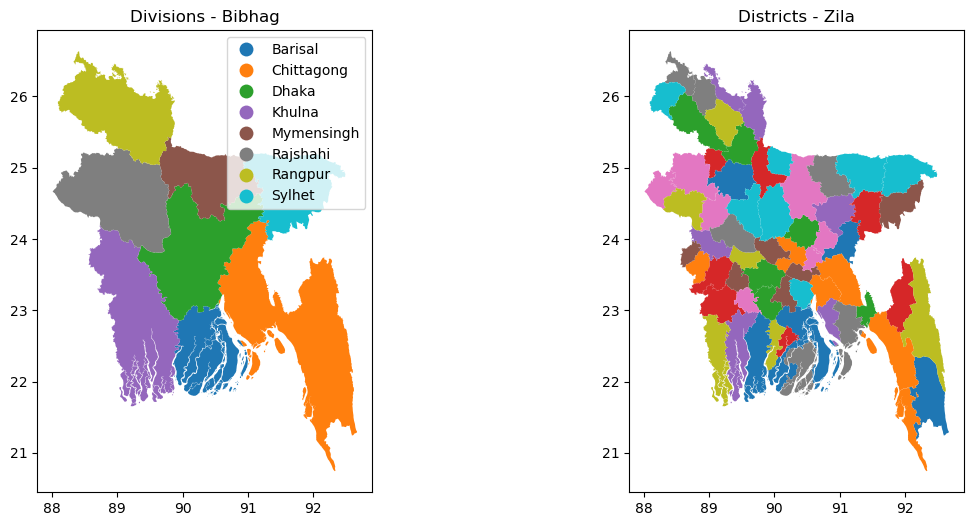

In [9]:
# this cell contains initial code for producing division and district maps of bangladesh

fig, ax = plt.subplots(1, 2, figsize = (14, 6))

map_df1.plot(column = 'NAME_1', legend = True, ax = ax[0])
map_df2.plot(column = 'NAME_2', ax = ax[1])

ax[0].set_title('Divisions - Bibhag')
ax[1].set_title('Districts - Zila')

plt.show()

In [9]:
# this is a cell for experimenting with basic data structures

data_2010 = data.loc[data['YEAR'] == 2010.0]

data_2010.head(104835) # this should show the start of october 2010 at the end of the table

ISO3C     Country  ADM2_code   ADM2_name   ADMIN1     AREA_km2  \
0        BGD  Bangladesh  BGD.1.1_1     Barguna  Barisal  1318.456625   
1        BGD  Bangladesh  BGD.1.2_1     Barisal  Barisal  2249.845955   
2        BGD  Bangladesh  BGD.1.3_1       Bhola  Barisal  1840.601230   
3        BGD  Bangladesh  BGD.1.4_1   Jhalokati  Barisal   719.246522   
4        BGD  Bangladesh  BGD.1.5_1  Patuakhali  Barisal  2497.708208   
...      ...         ...        ...         ...      ...          ...   
104830   BGD  Bangladesh  BGD.7.3_1   Sunamganj   Sylhet  3693.412442   
104831   BGD  Bangladesh  BGD.7.4_1      Sylhet   Sylhet  3417.893538   
104832   BGD  Bangladesh  BGD.1.1_1     Barguna  Barisal  1318.456625   
104833   BGD  Bangladesh  BGD.1.2_1     Barisal  Barisal  2249.845955   
104834   BGD  Bangladesh  BGD.1.3_1       Bhola  Barisal  1840.601230   

        LONGITUDE   LATITUDE    POPULATION  POP_POLYONLY  EVENT_COUNTS  \
0       90.119011  22.136310  1.872409e+06  8.725119e+05           0.0   
1       90.344229  22.817055  2.291591e+06  2.291591e+06           1.0   
2       90.729625  22.345066  1.796765e+06  1.796765e+06           0.0   
3       90.183853  22.574697  7.003910e+05  7.003910e+05           0.0   
4       90.398323  22.189495  1.561453e+06  1.561453e+06           0.0   
...           ...        ...           ...           ...           ...   
104830  91.345963  24.938027  2.501690e+06  2.501690e+06           0.0   
104831  91.986607  24.919139  3.452336e+06  3.452336e+06           0.0   
104832  90.119011  22.136310  1.872409e+06  8.725119e+05           0.0   
104833  90.344229  22.817055  2.291591e+06  2.291591e+06           0.0   
104834  90.729625  22.345066  1.796765e+06  1.796765e+06           0.0   

        EVENT_COUNTS_POLYONLY  RAW_COUNTS  FATALITIES  \
0                         0.0         0.0         0.0   
1                         1.0         1.0         0.0   
2                         0.0         0.0         0.0   
3                         0.0         0.0         0.0   
4                         0.0         0.0         0.0   
...                       ...         ...         ...   
104830                    0.0         0.0         0.0   
104831                    0.0         0.0         0.0   
104832                    0.0         0.0         0.0   
104833                    0.0         0.0         0.0   
104834                    0.0         0.0         0.0   

                        EVENT_TYPE    YEAR    DAY       DATE    MONTH  \
0                          Battles  2010.0    1.0 2010-01-01  2010-01   
1                          Battles  2010.0    1.0 2010-01-01  2010-01   
2                          Battles  2010.0    1.0 2010-01-01  2010-01   
3                          Battles  2010.0    1.0 2010-01-01  2010-01   
4                          Battles  2010.0    1.0 2010-01-01  2010-01   
...                            ...     ...    ...        ...      ...   
104830  Explosions/Remote violence  2010.0  273.0 2010-09-30  2010-09   
104831  Explosions/Remote violence  2010.0  273.0 2010-09-30  2010-09   
104832                     Battles  2010.0  274.0 2010-10-01  2010-10   
104833                     Battles  2010.0  274.0 2010-10-01  2010-10   
104834                     Battles  2010.0  274.0 2010-10-01  2010-10   

                         WEEK  
0       2009-12-28/2010-01-03  
1       2009-12-28/2010-01-03  
2       2009-12-28/2010-01-03  
3       2009-12-28/2010-01-03  
4       2009-12-28/2010-01-03  
...                       ...  
104830  2010-09-27/2010-10-03  
104831  2010-09-27/2010-10-03  
104832  2010-09-27/2010-10-03  
104833  2010-09-27/2010-10-03  
104834  2010-09-27/2010-10-03  

[104835 rows x 20 columns]

Plots by event type of events over time:

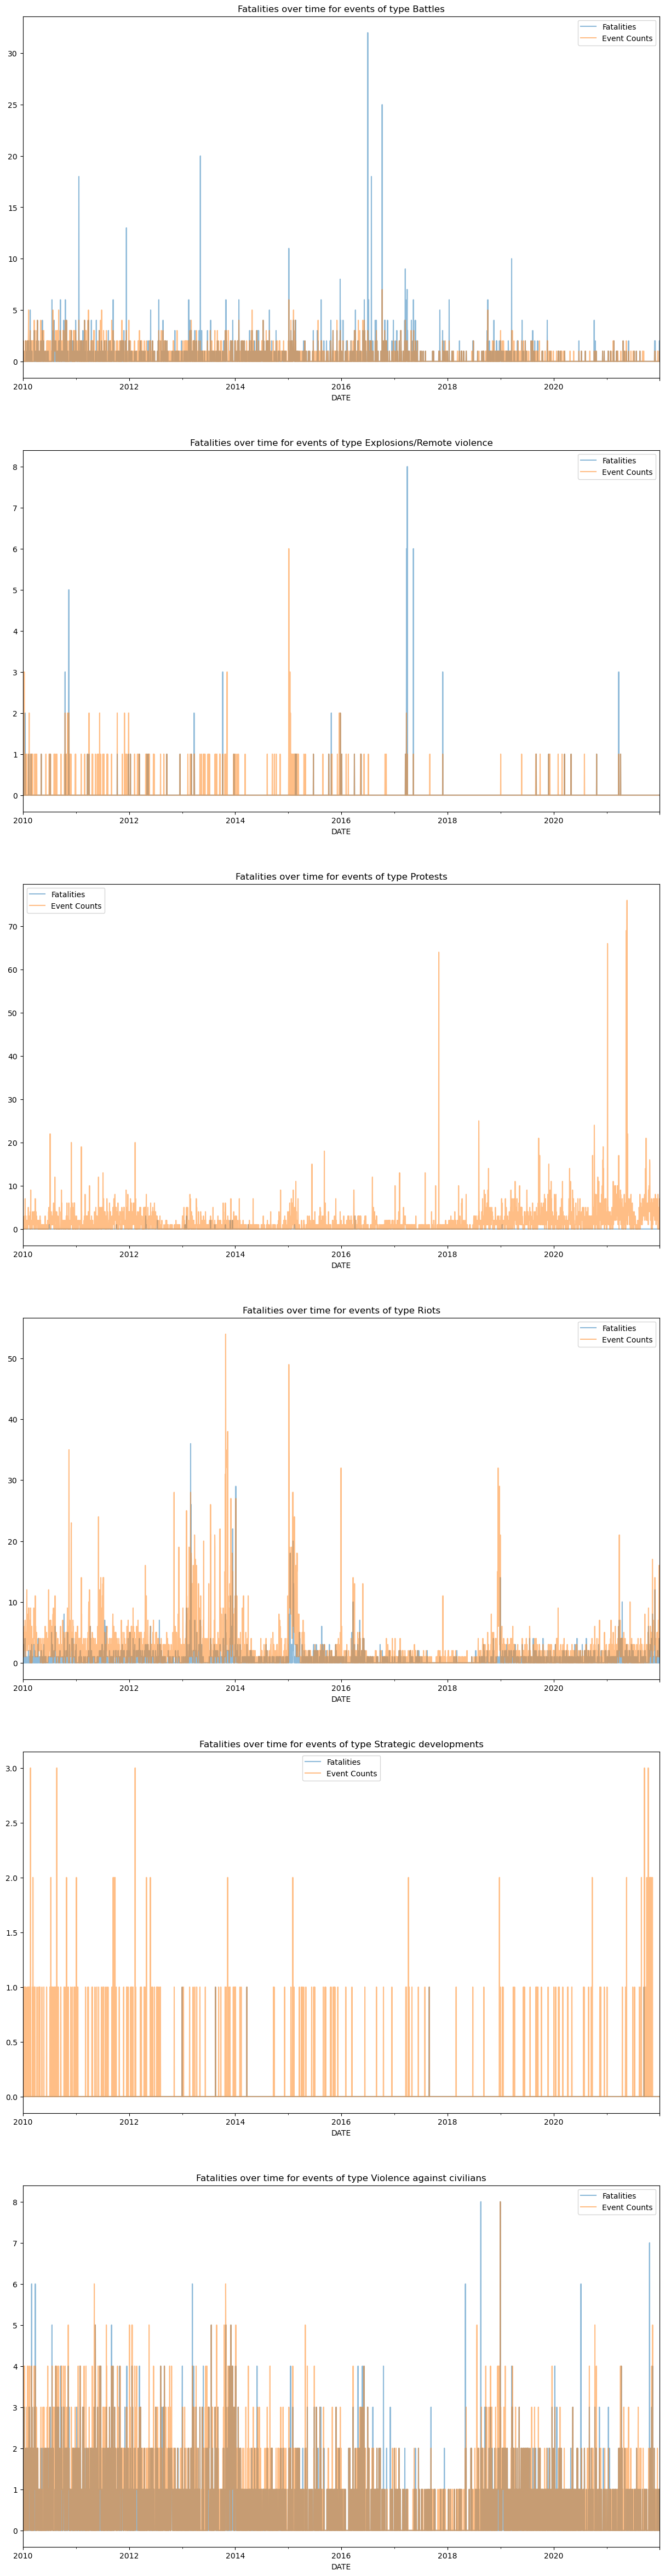

In [10]:
# this cell shows some code for graph plotting

event_grouped_data = data.groupby('EVENT_TYPE') # pandas grouper object, keys are the unique values in the column we grouped by

fig, ax = plt.subplots(6,1,figsize=(15,60)) # Define figure with 6 subplots, each has an axis stored in the 6 entries of ax

for idx, (event_type, df) in enumerate(event_grouped_data): # Loop over the grouper (this is a tuple of (key, corresponding subDataFrame)
    # idx is the index to assign to the correct graph
    # Use enumerate to get the index of the subplot (so overall we get a nested tuple of (index, (key, subDataFrame))
    df.groupby('DATE')['FATALITIES'].sum().plot(ax=ax[idx], label='Fatalities', alpha=0.5) # alpha gives transparaency to see both easily
    df.groupby('DATE')['RAW_COUNTS'].sum().plot(ax=ax[idx], label='Event Counts', alpha=0.5)
    ax[idx].set_title(f'Fatalities over time for events of type {event_type}')
    ax[idx].legend() # Renders the legend for the subplot, with the labels as given in the plot calls above

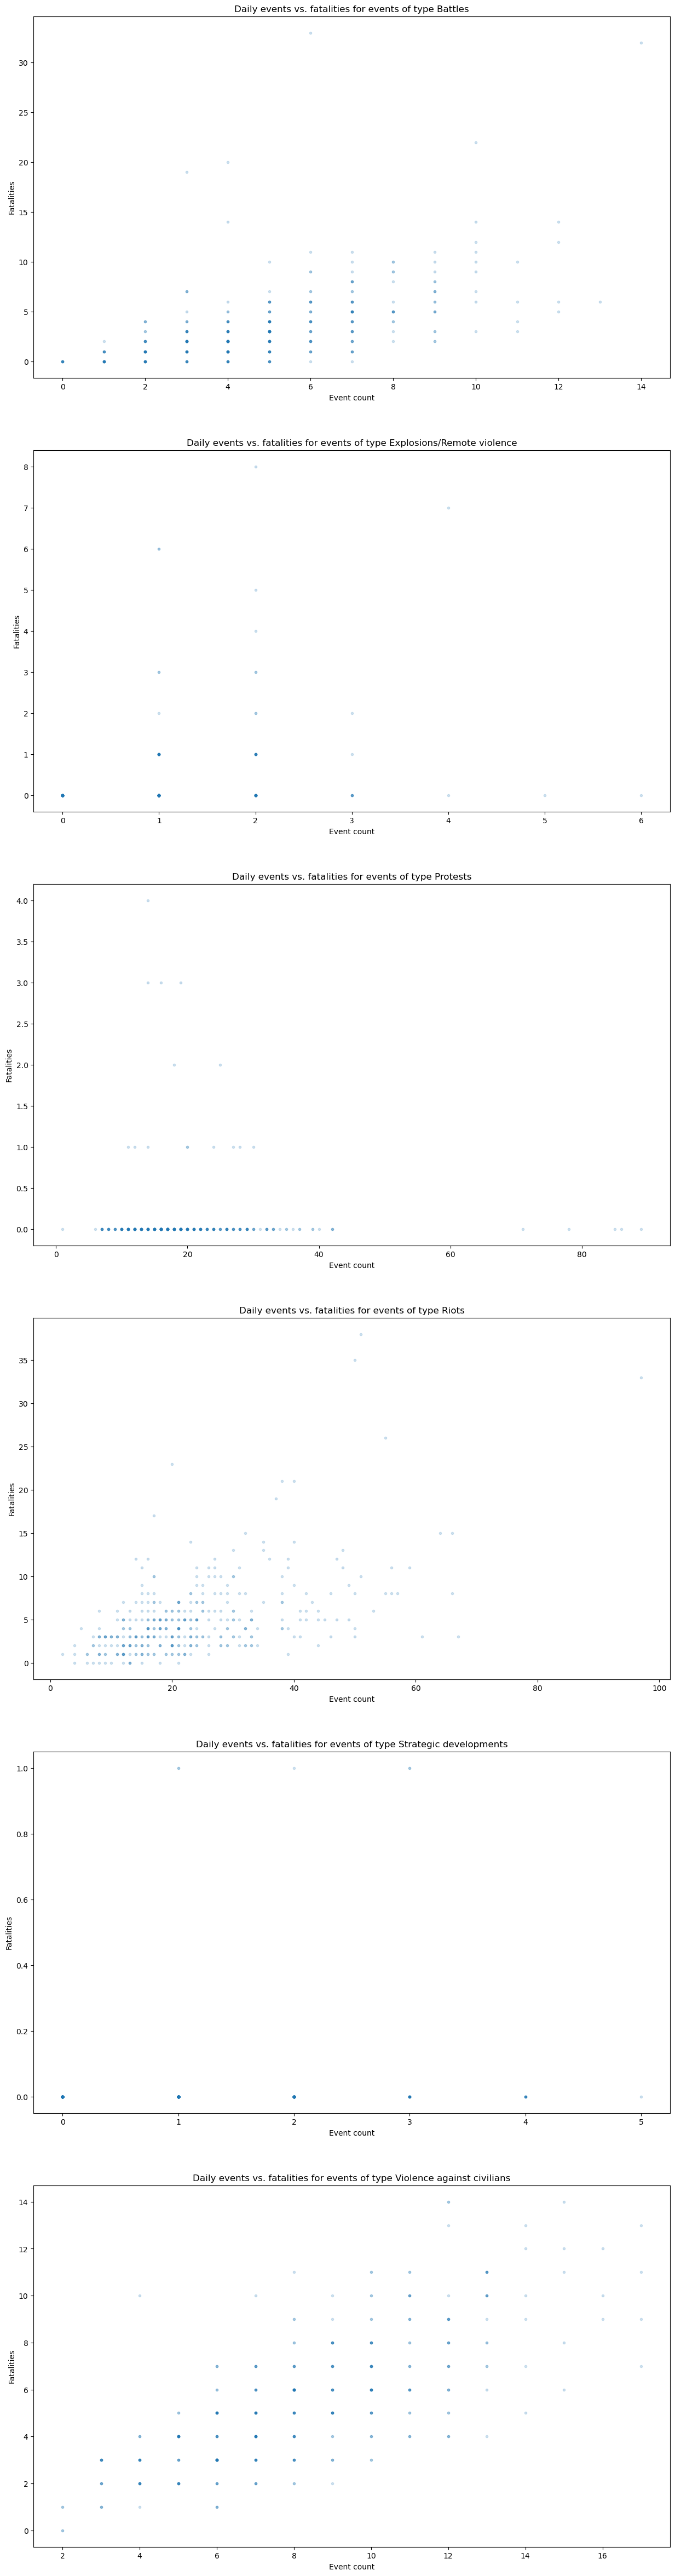

In [11]:
# these plots show the number of events vs the number of fatalities on a given day, points are semi transparent to show intensity

fig, ax = plt.subplots(6, 1, figsize = (15, 60))

for idx, (event_type, df) in enumerate(event_grouped_data):
    events = df.groupby('DAY')['EVENT_COUNTS'].sum()
    fatalities = df.groupby('DAY')['FATALITIES'].sum()
    ax[idx].plot(events, fatalities, marker='.', linestyle='None', alpha=0.2)
    ax[idx].set(xlabel = 'Event count',
                ylabel = 'Fatalities',
                title = f'Daily events vs. fatalities for events of type {event_type}')

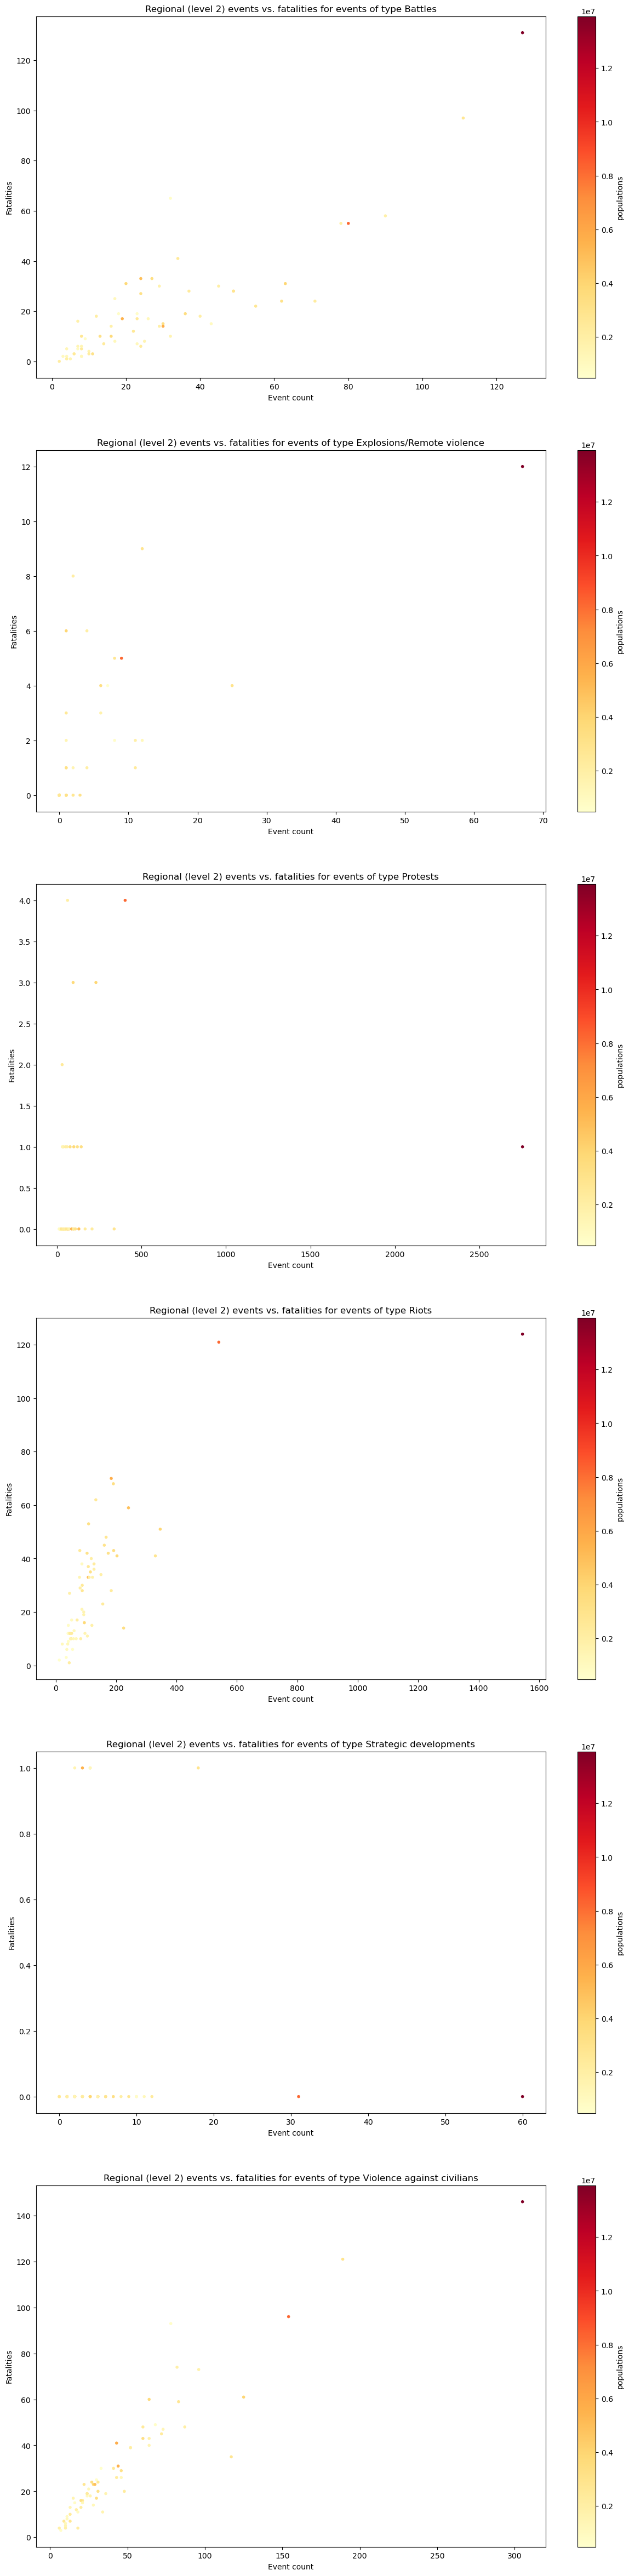

In [12]:
# this shows event count vs. fatalities for each region, points coloured for region population

fig, ax = plt.subplots(6, 1, figsize = (15, 60))

for idx, (event_type, df) in enumerate(event_grouped_data):
    region_df = df.groupby('ADM2_code')
    events = region_df['EVENT_COUNTS'].sum()
    fatalities = region_df['FATALITIES'].sum()
    population = region_df['POPULATION'].mean()
    # ax[idx].plot(events, fatalities, marker='.', linestyle='None') # would like a label for the region / colour code for population but not sure how
    scatter = ax[idx].scatter(events, fatalities, c=population, cmap='YlOrRd', marker='.', linestyle='None')
    ax[idx].set(xlabel = 'Event count',
                ylabel = 'Fatalities',
                title = f'Regional (level 2) events vs. fatalities for events of type {event_type}')
    fig.colorbar(scatter, ax=ax[idx], label = 'populations')
plt.show()


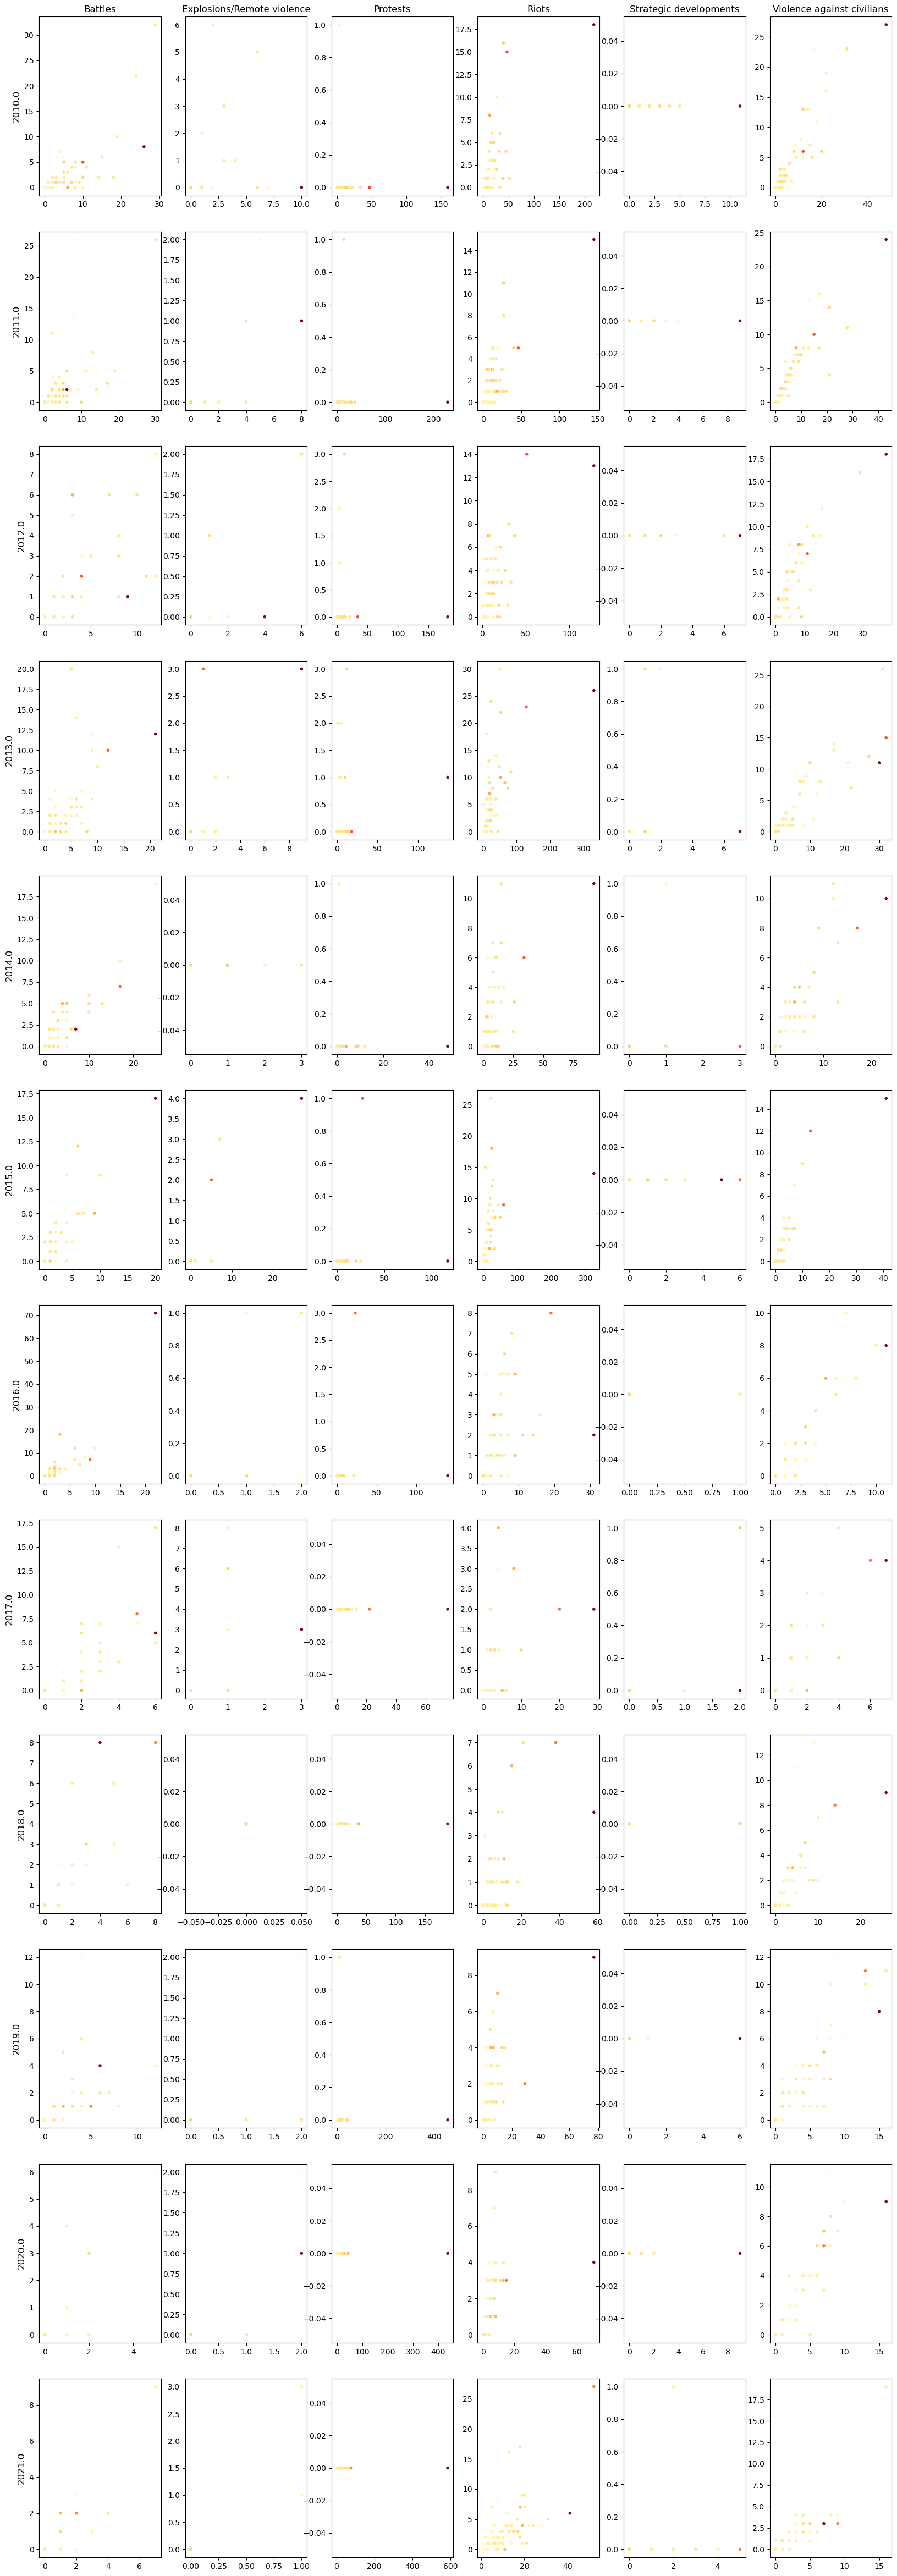

In [13]:
# this set of plots show the events vs fatalities for each year and each type of event, to see if there are any temporal changes

fig, ax = plt.subplots(12, 6, figsize = (20, 60))

for idx1, (event_type, df1) in enumerate(event_grouped_data):
    year_grouped_data = df1.groupby('YEAR')
    ax[0, idx1].set_title(event_type, fontsize=12)
    for idx2, (year, df2) in enumerate(year_grouped_data):
        region_df = df2.groupby('ADM2_code')
        events = region_df['EVENT_COUNTS'].sum()
        fatalities = region_df['FATALITIES'].sum()
        population = region_df['POPULATION'].mean()
        scatter = ax[idx2, idx1].scatter(events, fatalities, c=population, cmap='YlOrRd', marker='.')
        ax[idx2, 0].set_ylabel(year, fontsize = 12)

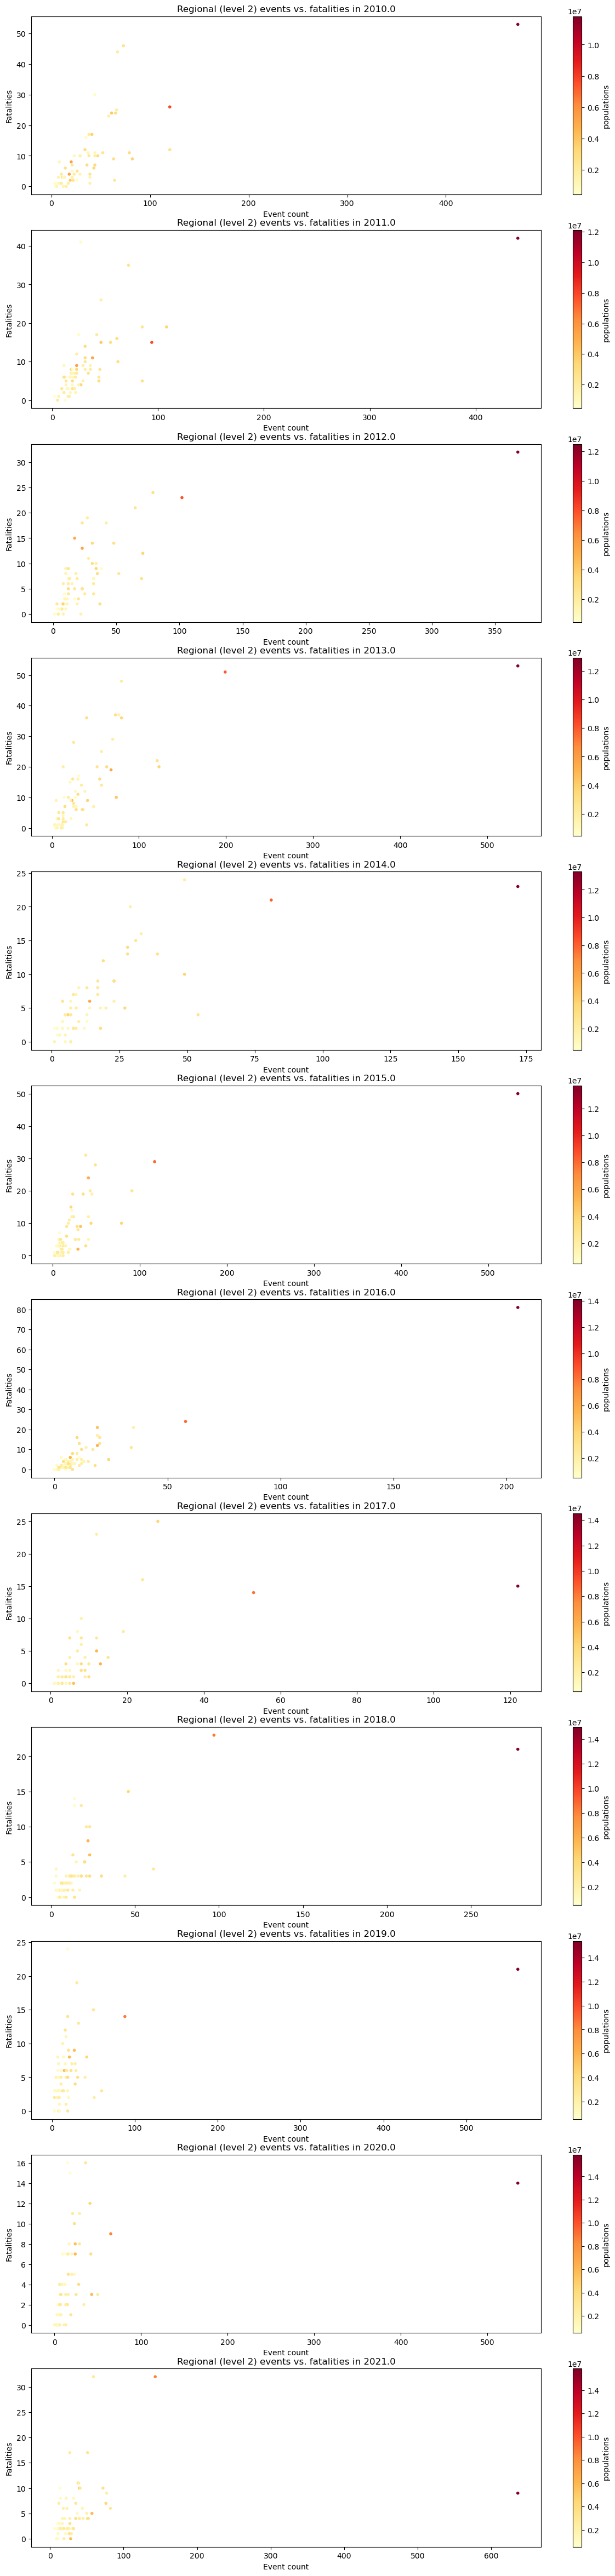

In [14]:
# this set of plots show the events vs fatalities graphs aggregated by year, for each region colour coded by population
# this cell uses the agg method with groupby

year_grouped_data = data.groupby("YEAR")

fig, ax = plt.subplots(12, 1, figsize = (15, 60))

for idx, (year, df) in enumerate(year_grouped_data):
    region_df = df.groupby('ADM2_code')[['EVENT_COUNTS', 'FATALITIES', 'POPULATION']].agg({'EVENT_COUNTS': 'sum', 'FATALITIES': 'sum', 'POPULATION': 'mean'})
    # region_df = df.groupby('ADM2_code')
    # events = region_df['EVENT_COUNTS'].sum()
    # fatalities = region_df['FATALITIES'].sum()
    # population = region_df['POPULATION'].mean()
    # scatter = ax[idx].scatter(events, fatalities, c=population, cmap='YlOrRd', marker='.', linestyle='None')
    scatter = ax[idx].scatter(region_df['EVENT_COUNTS'], region_df['FATALITIES'], c=region_df['POPULATION'], cmap='YlOrRd', marker='.', linestyle='None')
    ax[idx].set(xlabel = 'Event count',
                ylabel = 'Fatalities',
                title = f'Regional (level 2) events vs. fatalities in {year}')
    fig.colorbar(scatter, ax=ax[idx], label = 'populations')

In [83]:
event_brief = {'Battles': 'Battles',
               'Explosions/Remote violence': 'Explosions',
               'Protests': 'Protests',
               'Riots': 'Riots',
               'Strategic developments': 'Strat. devel\'s',
               'Violence against civilians': 'Viol. a/ civil\'s'}

count_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]

bin_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11+']

colours = [(10/16, 3/16, 5/16), (12/16, 6/16, 6/16), (14/16, 9/16, 4/16), (14/16, 13/16, 0/16), (9/16, 13/16, 5/16), (4/16, 13/16, 8/16),
           (2/16, 12/16, 11/16), (0/16, 11/16, 12/16), (0/16, 9/16, 12/16), (3/16, 6/16, 11/16), (6/16, 3/16, 9/16), (8/16, 1/16, 7/16)]

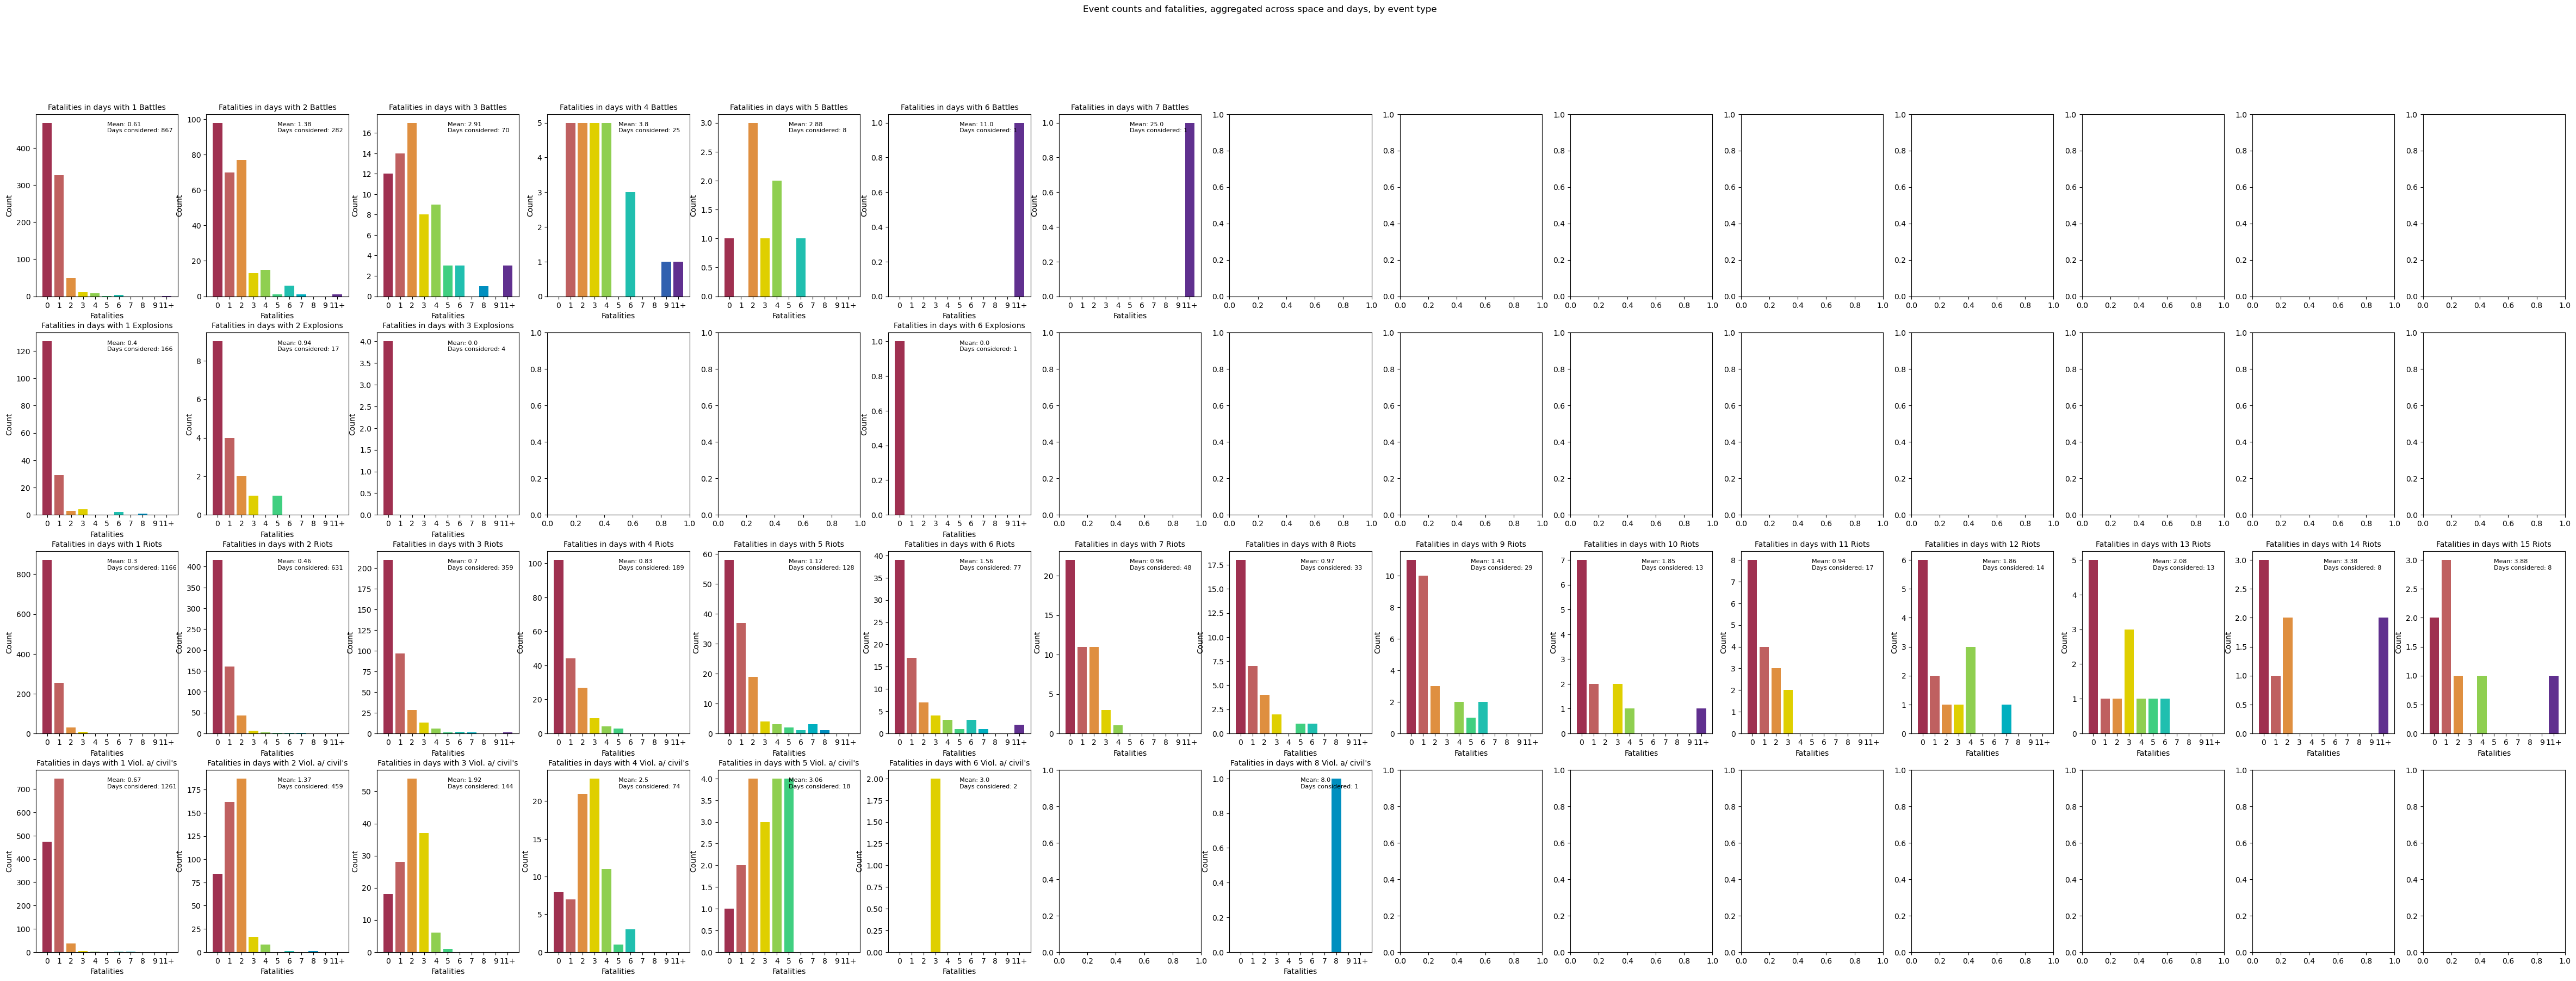

In [84]:
# this is to recreate Figure 5 of the report - the bar charts
# I think Figure 5 might actually be aggregated by day and not by week (as its title suggests)

tot_events = 15 # change this to look at different numbers of events

fig, ax = plt.subplots(4, tot_events, figsize = (tot_events*4, 20))

fatal_data = data.loc[data['EVENT_TYPE'] != 'Protests'].loc[data['EVENT_TYPE'] != 'Strategic developments'].groupby(['EVENT_TYPE', 'DATE'], as_index=False)[['EVENT_COUNTS', 'FATALITIES']].sum()

event_grouped_fatal_data = fatal_data.groupby('EVENT_TYPE')

for idx, (event, df) in enumerate(event_grouped_fatal_data):
    for num in range(tot_events):
        num_df = df.loc[df['EVENT_COUNTS'] == num+1]
        if num_df.size != 0:
            num_df['FATALITIES_BINS'] = pd.cut(num_df['FATALITIES'], bins = count_bins, right=False)
            num_df_count = num_df.groupby(['FATALITIES_BINS', 'EVENT_TYPE'], as_index=False)['EVENT_COUNTS'].count().reset_index()
            event_counts = num_df_count['EVENT_COUNTS']
            events_considered = sum(event_counts)
            mean_fatalities = round(np.mean(num_df['FATALITIES']), 2)
            ax[idx, num].text(0.5, 0.9, f'Mean: {mean_fatalities}\nDays considered: {events_considered}', transform=ax[idx, num].transAxes, fontsize=8)
            ax[idx, num].bar(bin_labels, event_counts, color = colours)
            ax[idx, num].set_title(f'Fatalities in days with {num + 1} {event_brief[event]}', fontsize=10)
            ax[idx, num].set_xlabel('Fatalities')
            ax[idx, num].set_ylabel('Count')

plt.suptitle('Event counts and fatalities, aggregated across space and days, by event type')

plt.show()


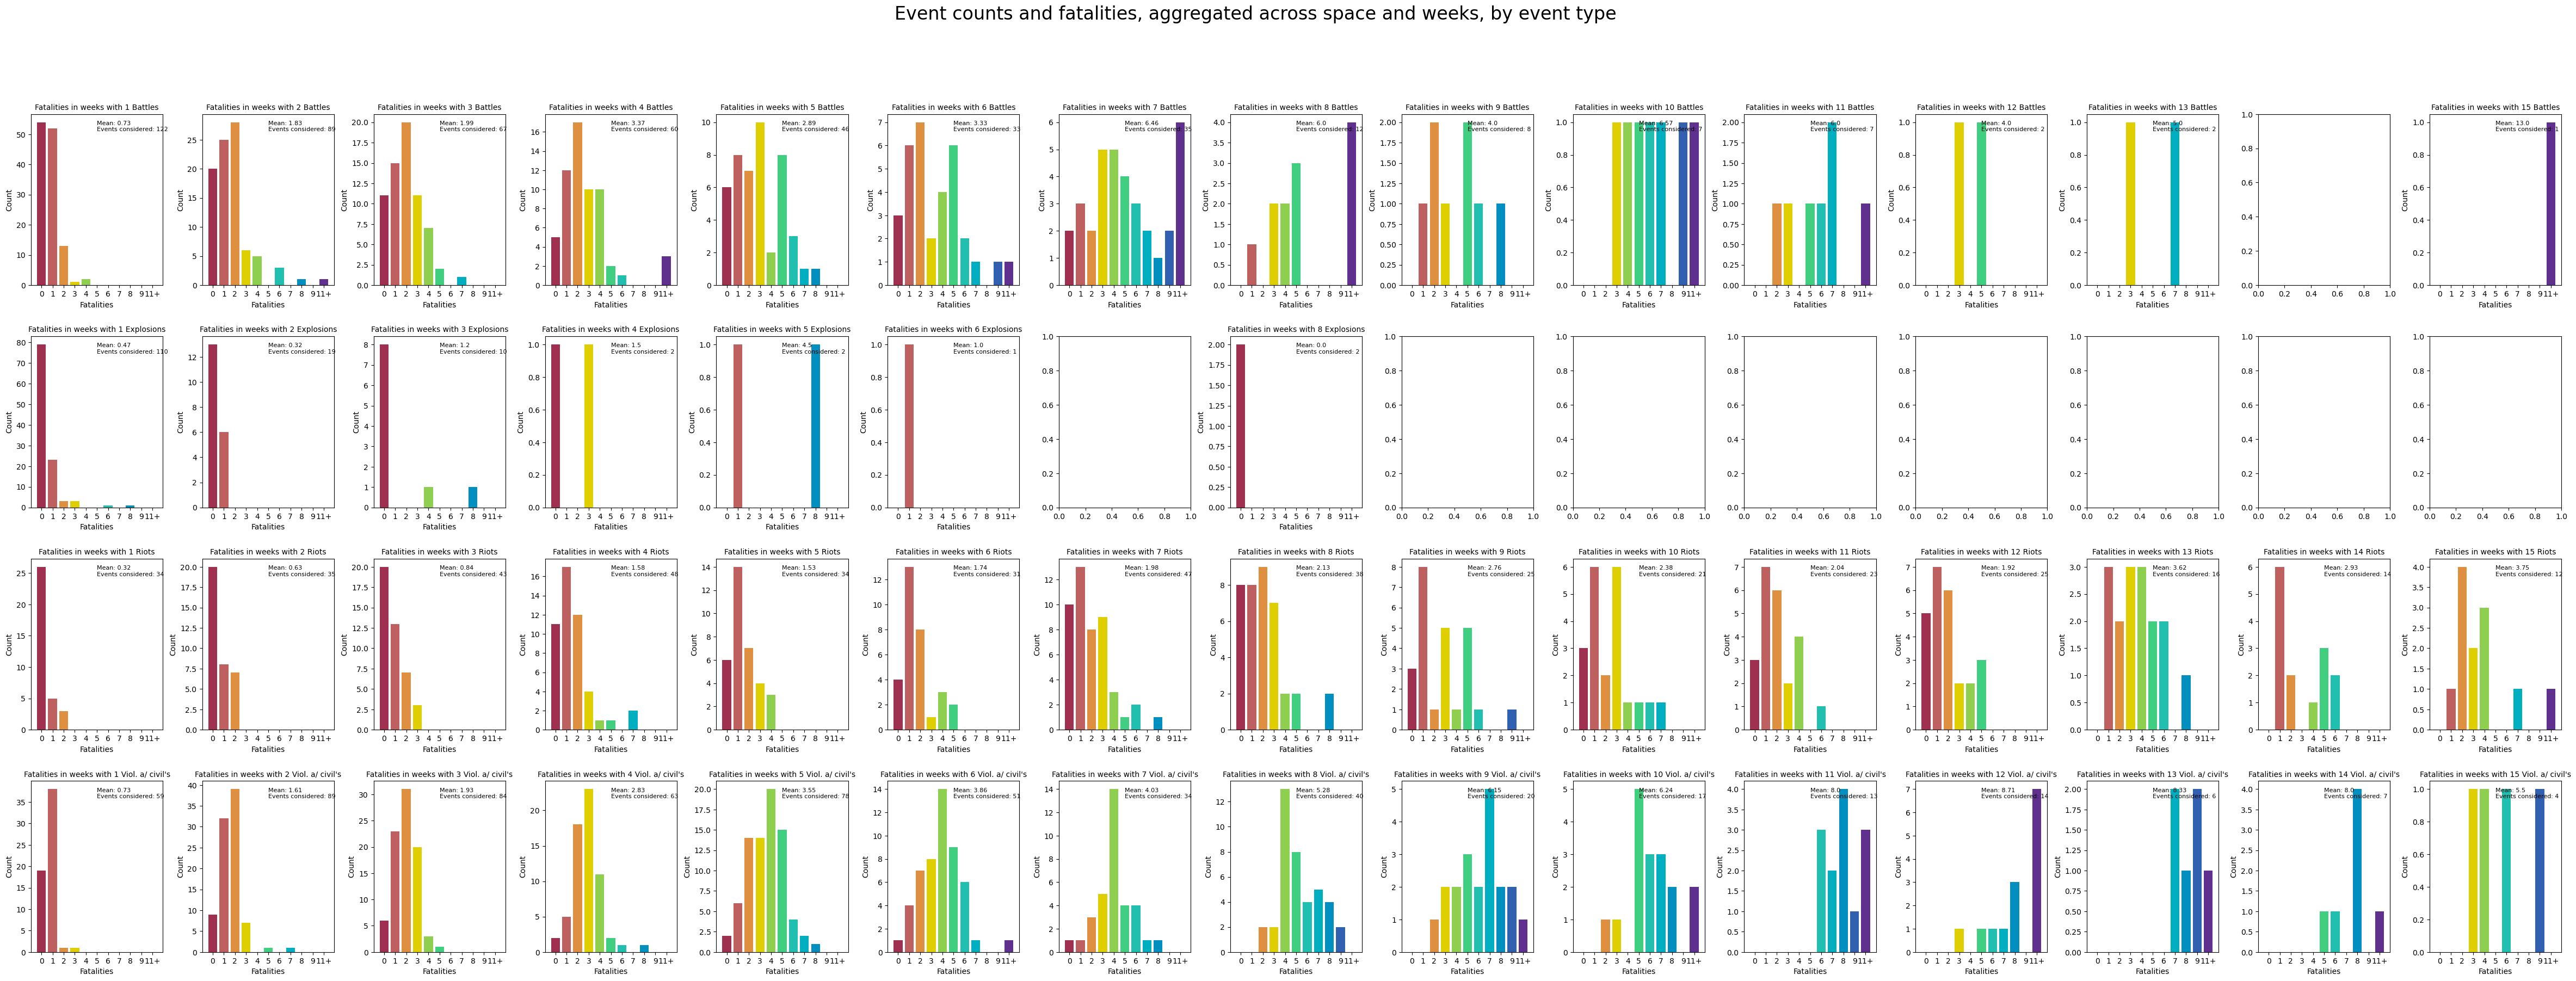

In [101]:
# this produces the same charts but aggregated by week

tot_events = 15 # change this to look at different numbers of events

fig, ax = plt.subplots(4, tot_events, figsize = (tot_events*4, 20))

fatal_data = data.loc[data['EVENT_TYPE'] != 'Protests'].loc[data['EVENT_TYPE'] != 'Strategic developments'].groupby(['EVENT_TYPE', 'WEEK'], as_index=False)[['EVENT_COUNTS', 'FATALITIES']].sum()

event_grouped_fatal_data = fatal_data.groupby('EVENT_TYPE')

for idx, (event, df) in enumerate(event_grouped_fatal_data):
    for num in range(tot_events):
        num_df = df.loc[df['EVENT_COUNTS'] == num+1]
        if num_df.size != 0:
            num_df['FATALITIES_BINS'] = pd.cut(num_df['FATALITIES'], bins = count_bins, right=False)
            num_df_count = num_df.groupby(['FATALITIES_BINS', 'EVENT_TYPE'], as_index=False)['EVENT_COUNTS'].count().reset_index()
            event_counts = num_df_count['EVENT_COUNTS']
            events_considered = sum(event_counts)
            mean_fatalities = round(np.mean(num_df['FATALITIES']), 2)
            ax[idx, num].text(0.5, 0.9, f'Mean: {mean_fatalities}\nEvents considered: {events_considered}', transform=ax[idx, num].transAxes, fontsize=8)
            ax[idx, num].bar(bin_labels, event_counts, color = colours)
            ax[idx, num].set_title(f'Fatalities in weeks with {num + 1} {event_brief[event]}', fontsize=10)
            ax[idx, num].set_xlabel('Fatalities')
            ax[idx, num].set_ylabel('Count')

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Event counts and fatalities, aggregated across space and weeks, by event type', fontsize=24)

plt.show()

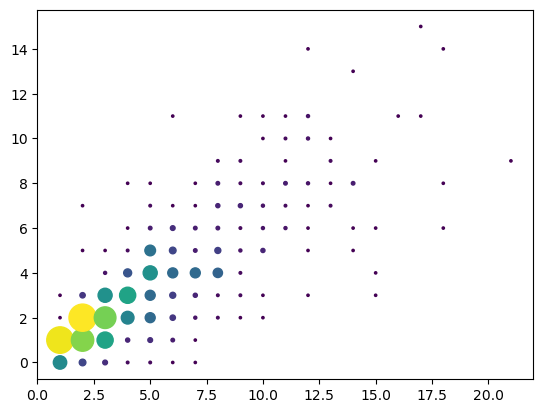

In [86]:
test = df.loc[df['EVENT_COUNTS']!=0].groupby(['EVENT_COUNTS', 'FATALITIES'], as_index=False)['WEEK'].count()

fig, ax = plt.subplots()

scatter = ax.scatter(test['EVENT_COUNTS'], test['FATALITIES'], 10+test['WEEK']**2, c=test['WEEK'], marker='.', linestyle='None')
#fig.colorbar(scatter, ax=ax, label = 'count')

plt.show()

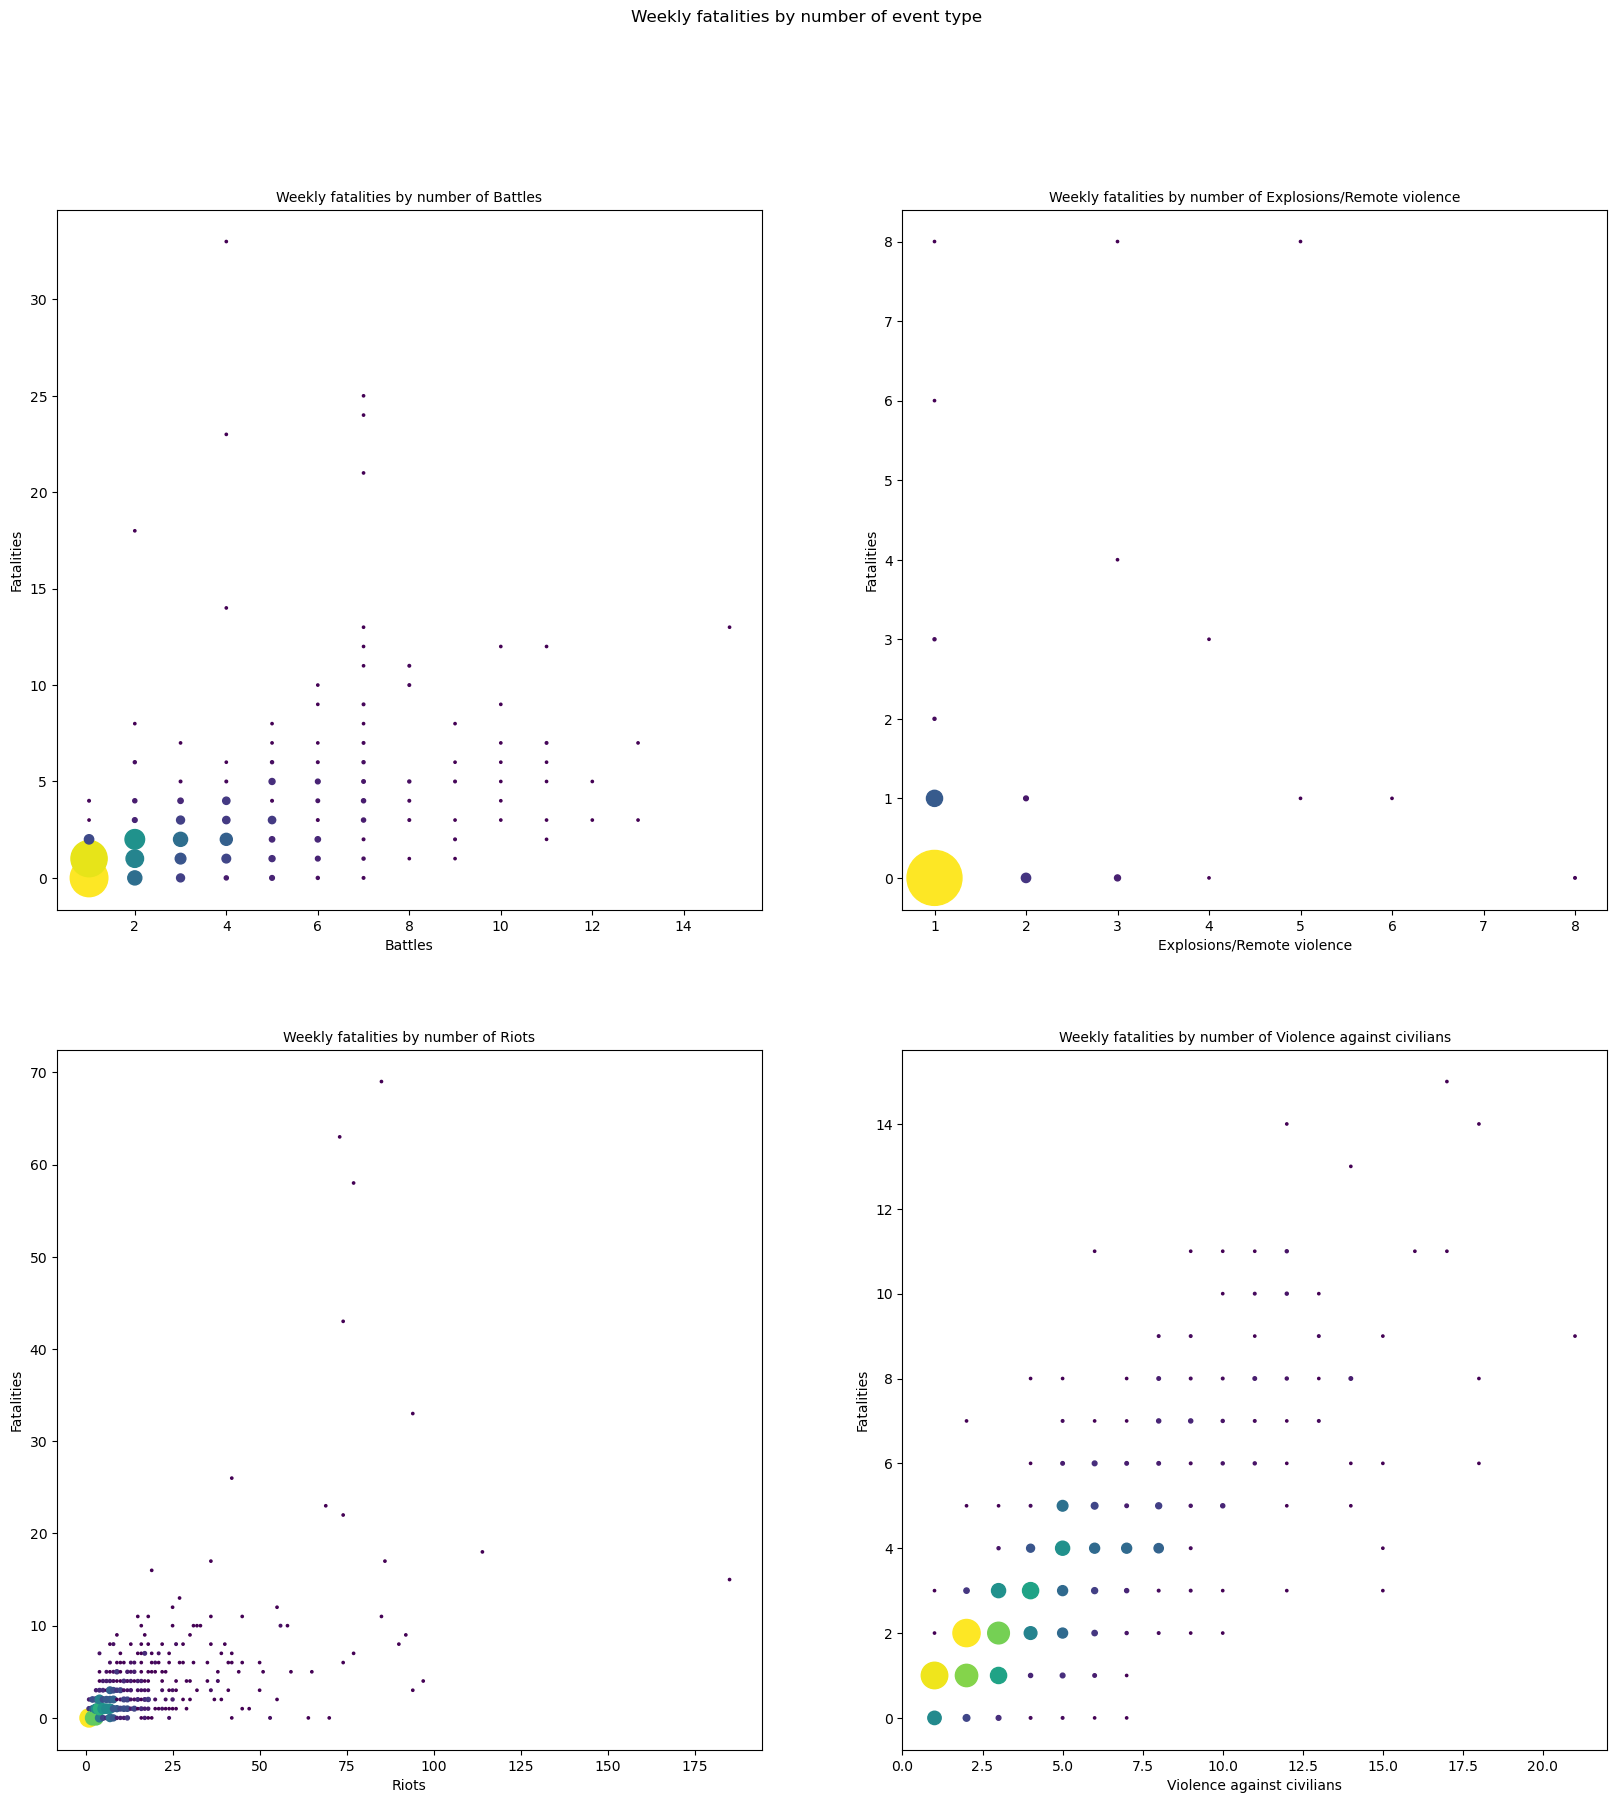

In [94]:
fatal_data = data.loc[data['EVENT_TYPE'] != 'Protests'].loc[data['EVENT_TYPE'] != 'Strategic developments'].groupby(['EVENT_TYPE', 'WEEK'], as_index=False)[['EVENT_COUNTS', 'FATALITIES']].sum()

fig, ax = plt.subplots(2, 2, figsize=(20,20))

event_grouped_fatal_data = fatal_data.groupby('EVENT_TYPE')

for idx, (event, df) in enumerate(event_grouped_fatal_data):
    x = idx%2
    y = idx//2
    count_df = df.loc[df['EVENT_COUNTS']!=0].groupby(['EVENT_COUNTS', 'FATALITIES'], as_index=False)['WEEK'].count()
    scatter = ax[y, x].scatter(count_df['EVENT_COUNTS'], count_df['FATALITIES'], 10+count_df['WEEK']**2, c=count_df['WEEK'], marker='.', linestyle='None')
    ax[y, x].set_title(f'Weekly fatalities by number of {event}', fontsize=10)
    ax[y, x].set_xlabel(f'{event}')
    ax[y, x].set_ylabel('Fatalities')

plt.suptitle('Weekly fatalities by number of event type')

plt.show()

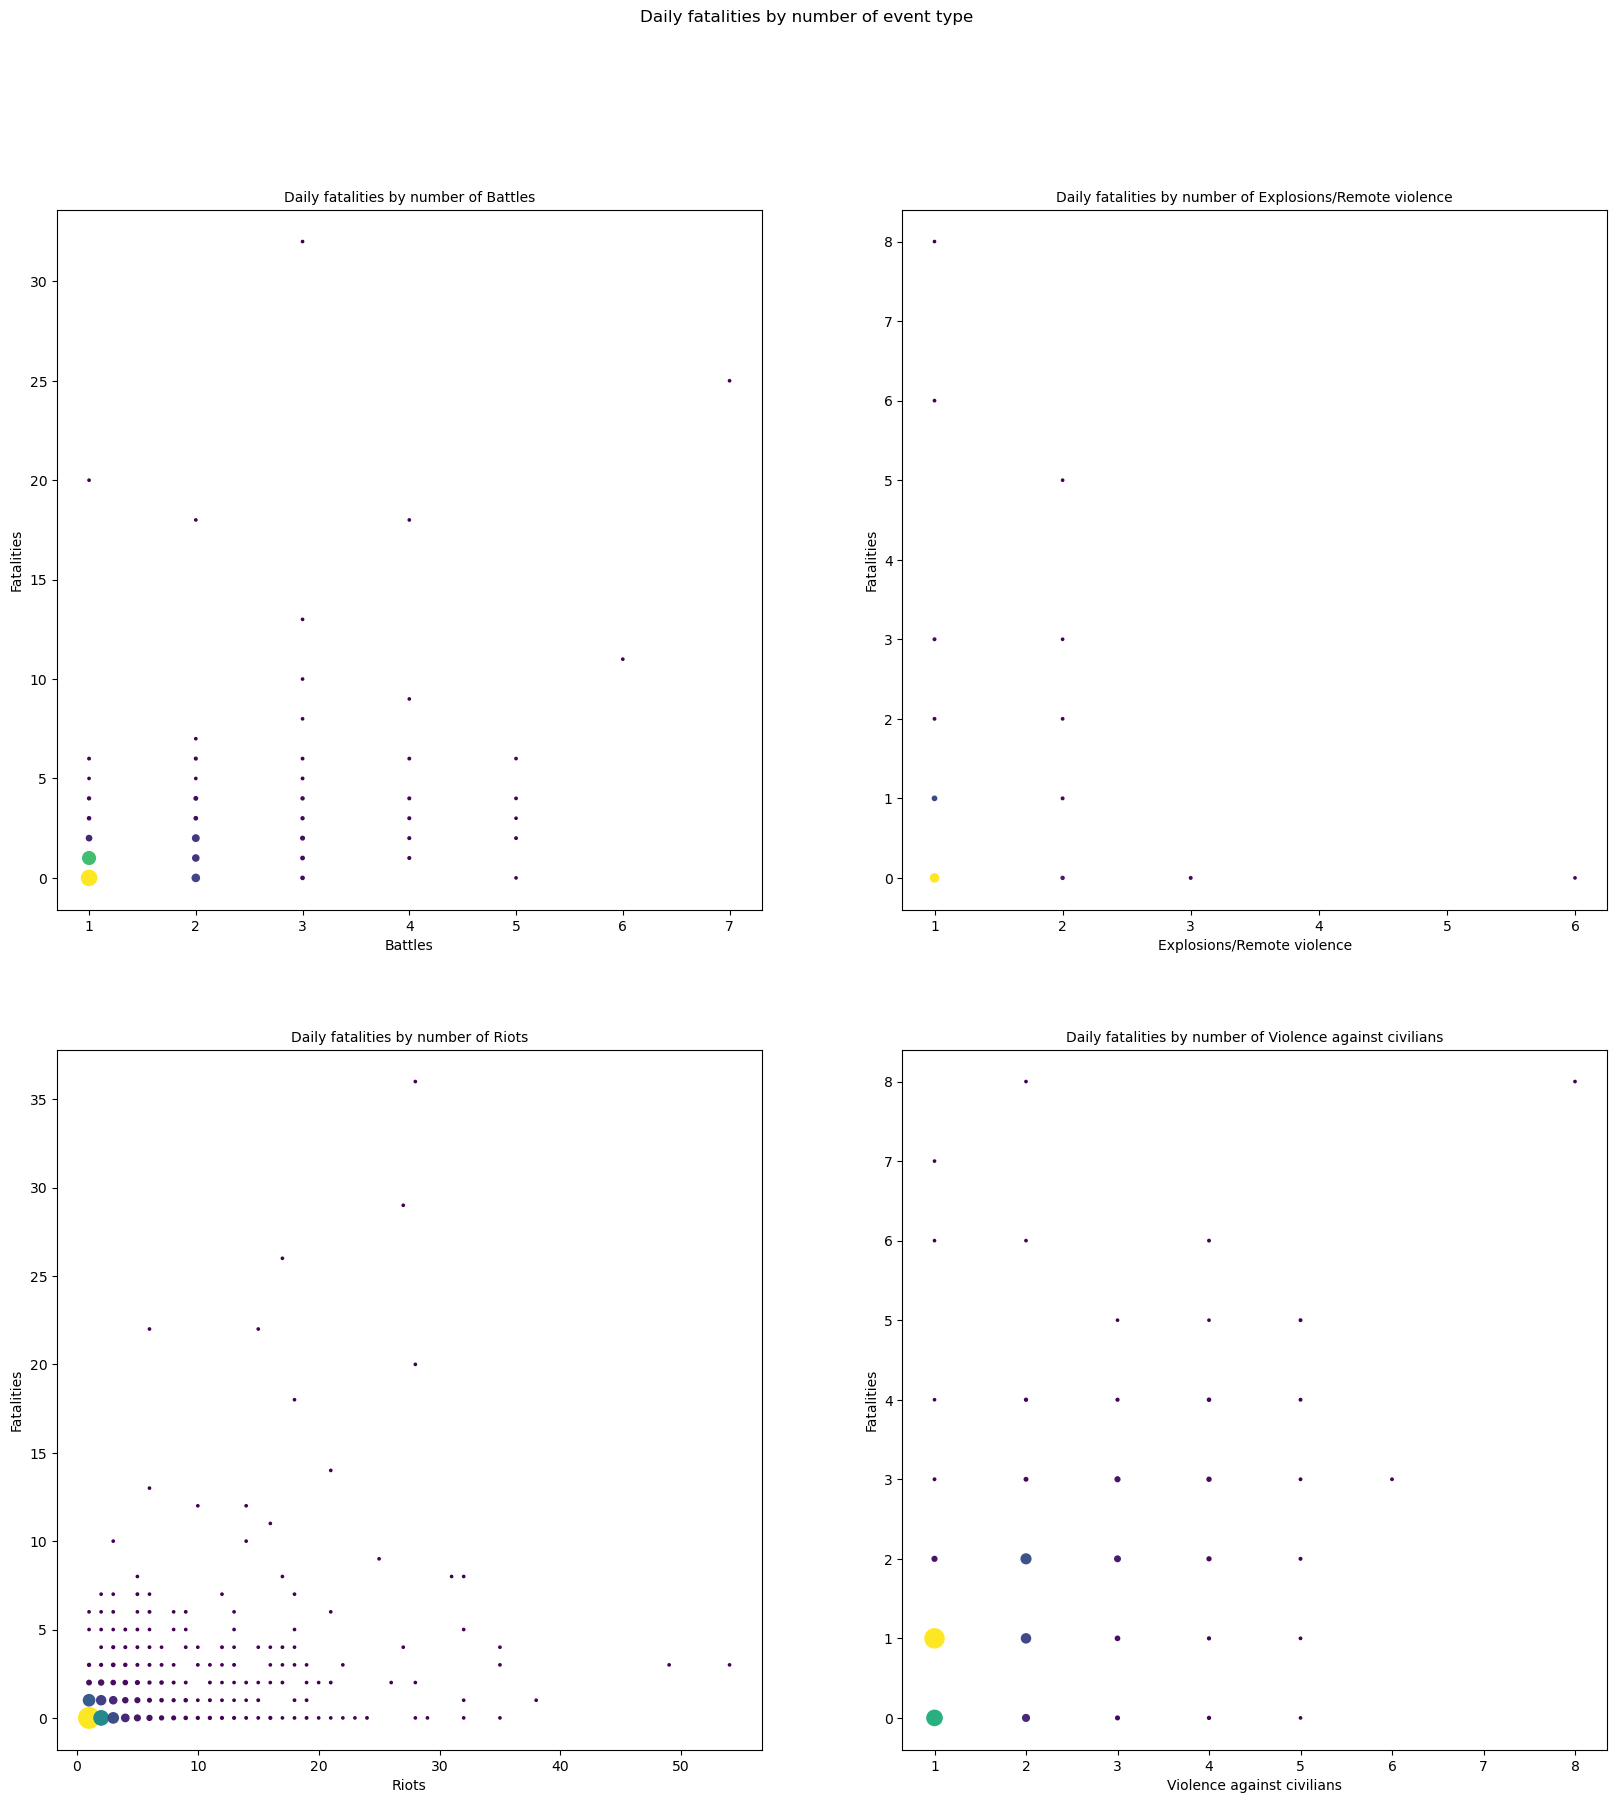

In [96]:
fatal_data = data.loc[data['EVENT_TYPE'] != 'Protests'].loc[data['EVENT_TYPE'] != 'Strategic developments'].groupby(['EVENT_TYPE', 'DATE'], as_index=False)[['EVENT_COUNTS', 'FATALITIES']].sum()

fig, ax = plt.subplots(2, 2, figsize=(20,20))

event_grouped_fatal_data = fatal_data.groupby('EVENT_TYPE')

for idx, (event, df) in enumerate(event_grouped_fatal_data):
    x = idx%2
    y = idx//2
    count_df = df.loc[df['EVENT_COUNTS']!=0].groupby(['EVENT_COUNTS', 'FATALITIES'], as_index=False)['DATE'].count()
    scatter = ax[y, x].scatter(count_df['EVENT_COUNTS'], count_df['FATALITIES'], 10+count_df['DATE'], c=count_df['DATE'], marker='.', linestyle='None')
    ax[y, x].set_title(f'Daily fatalities by number of {event}', fontsize=10)
    ax[y, x].set_xlabel(f'{event}')
    ax[y, x].set_ylabel('Fatalities')

plt.suptitle('Daily fatalities by number of event type')
plt.show()

In [133]:
binary_bin = [0, 1, float('inf')]

# df['FATAL_INDICATOR'] = pd.cut(df['FATALITIES'], bins = binary_bin, right=False)

# df.loc[df['FATALITIES'] == 0]

df.loc[df['FATALITIES'] == 0].shape[0]/df.shape[0]

df.astype(bool).sum(axis=0)['FATALITIES']

def fatality_proportion(df):
    return 1 - df.loc[df['FATALITIES'] == 0].shape[0]/df.shape[0]

# fatality_proportion(df.loc[df['EVENT_COUNTS'] == 3])

props = []
event_counts = []
for num, (count, sub_df) in enumerate(df.groupby('EVENT_COUNTS')):
    event_counts.append(count)
    props.append(fatality_proportion(sub_df))

event_counts

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 21.0]

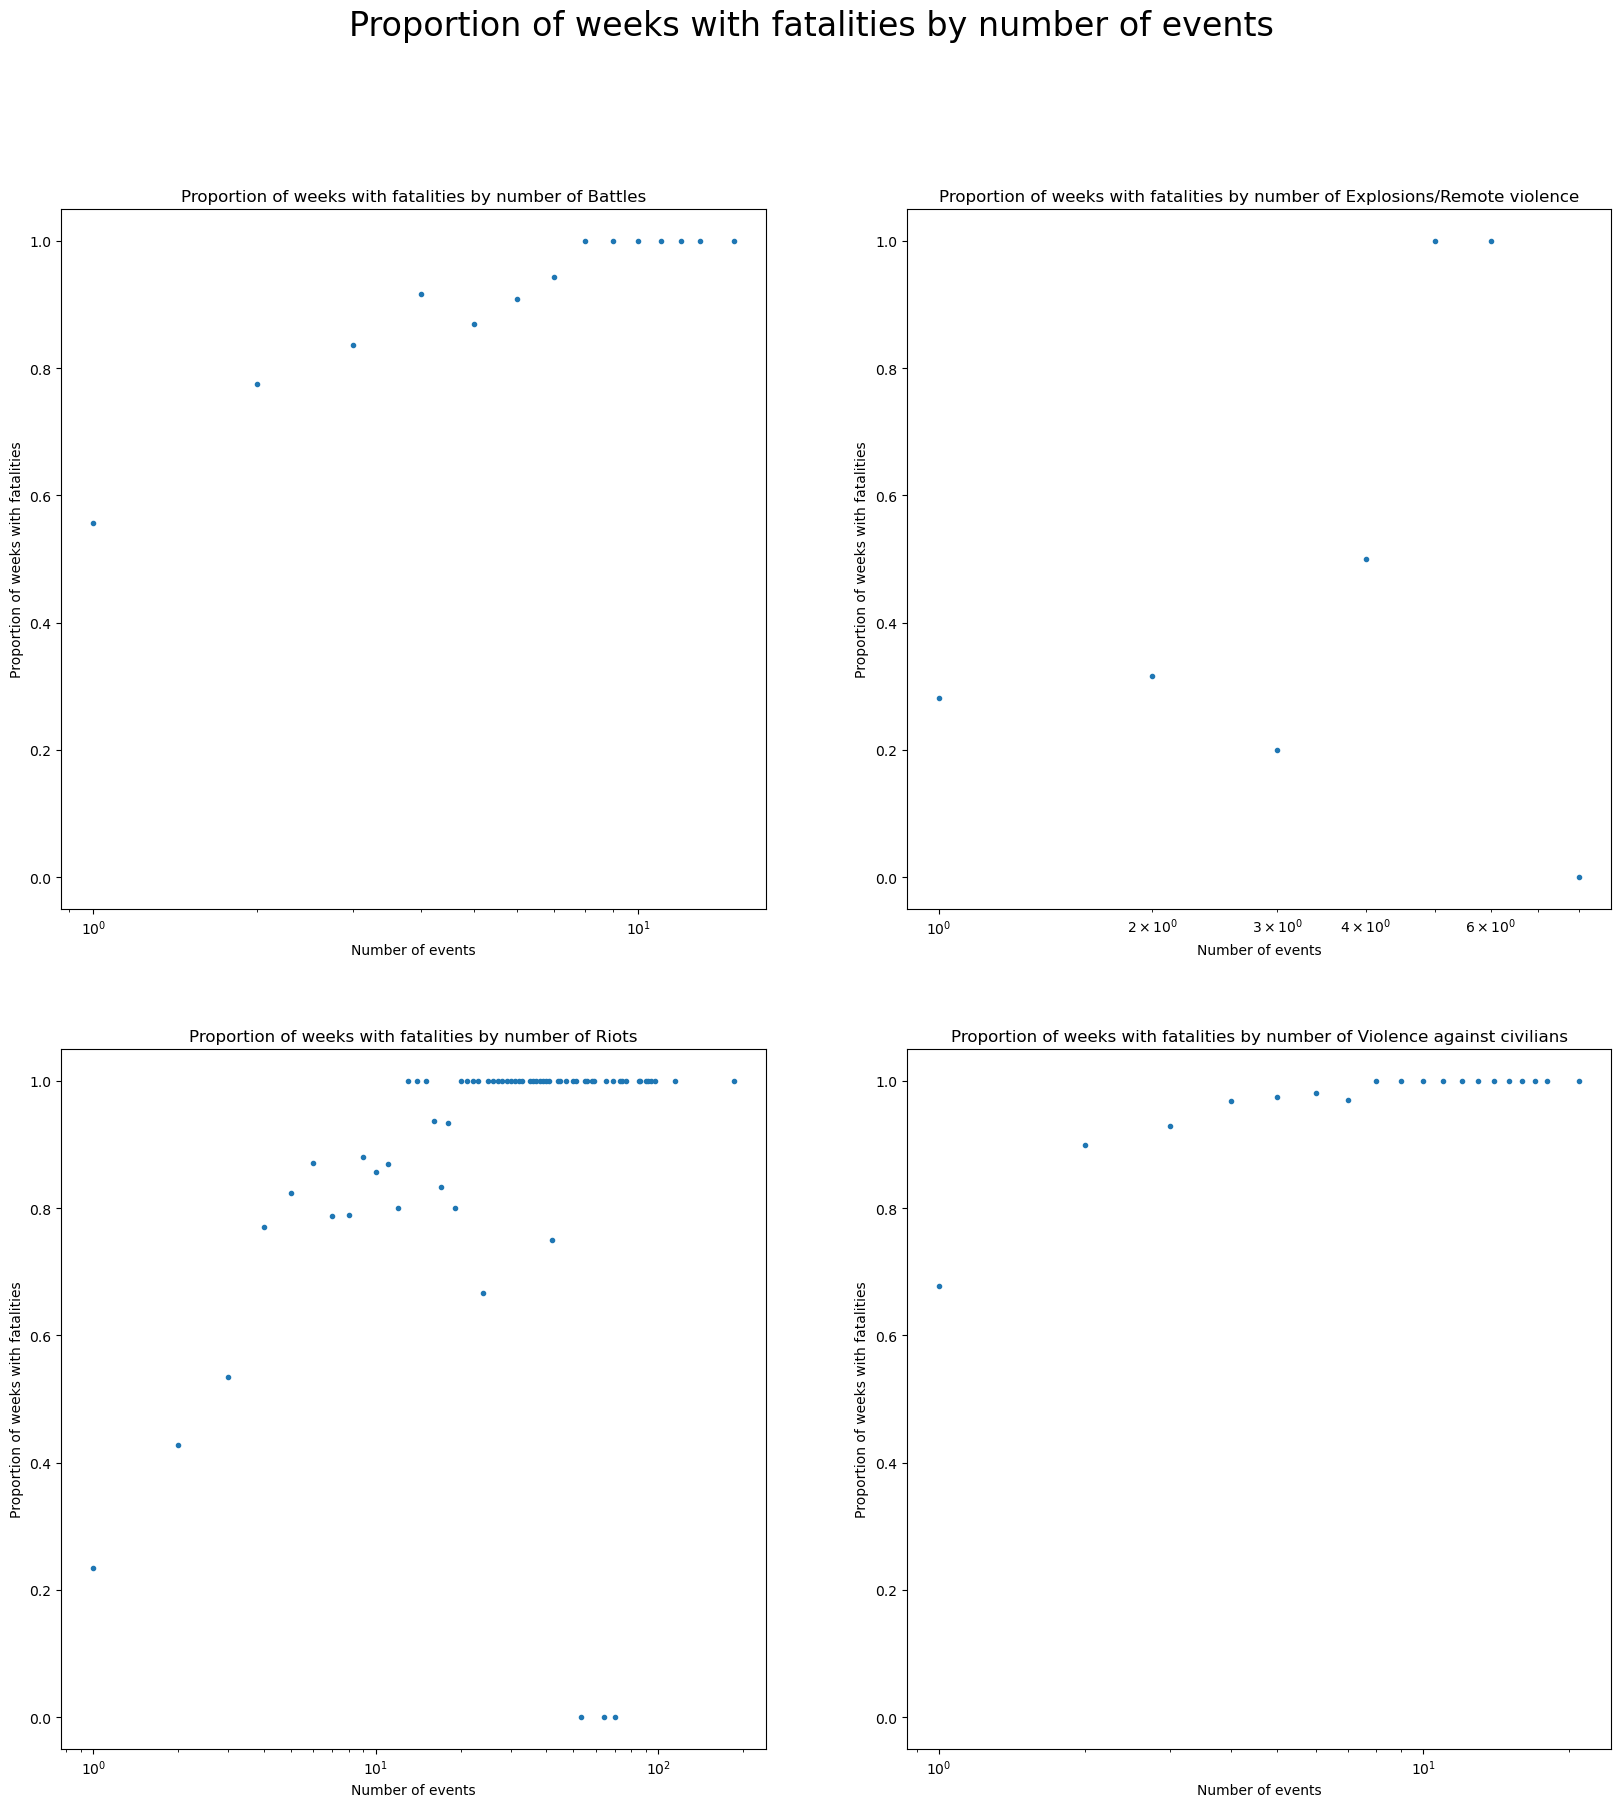

In [143]:
fatal_data = data.loc[data['EVENT_TYPE'] != 'Protests'].loc[data['EVENT_TYPE'] != 'Strategic developments'].groupby(['EVENT_TYPE', 'WEEK'], as_index=False)[['EVENT_COUNTS', 'FATALITIES']].sum()

fig, ax = plt.subplots(2, 2, figsize=(20,20))

event_grouped_fatal_data = fatal_data.groupby('EVENT_TYPE')

for idx, (event, df) in enumerate(event_grouped_fatal_data):
    x = idx%2
    y = idx//2
    fatality_props = []
    event_counts = []
    for num, (count, sub_df) in enumerate(df.groupby('EVENT_COUNTS')):
        event_counts.append(count)
        fatality_props.append(fatality_proportion(sub_df))
    scatter = ax[y, x].scatter(event_counts, fatality_props, marker='.', linestyle='None')
    ax[y, x].set_xscale('log')
    ax[y, x].set_title(f'Proportion of weeks with fatalities by number of {event}')
    ax[y, x].set_xlabel(f'Number of events')
    ax[y, x].set_ylabel('Proportion of weeks with fatalities')

plt.suptitle('Proportion of weeks with fatalities by number of events', fontsize = 24)

plt.show()

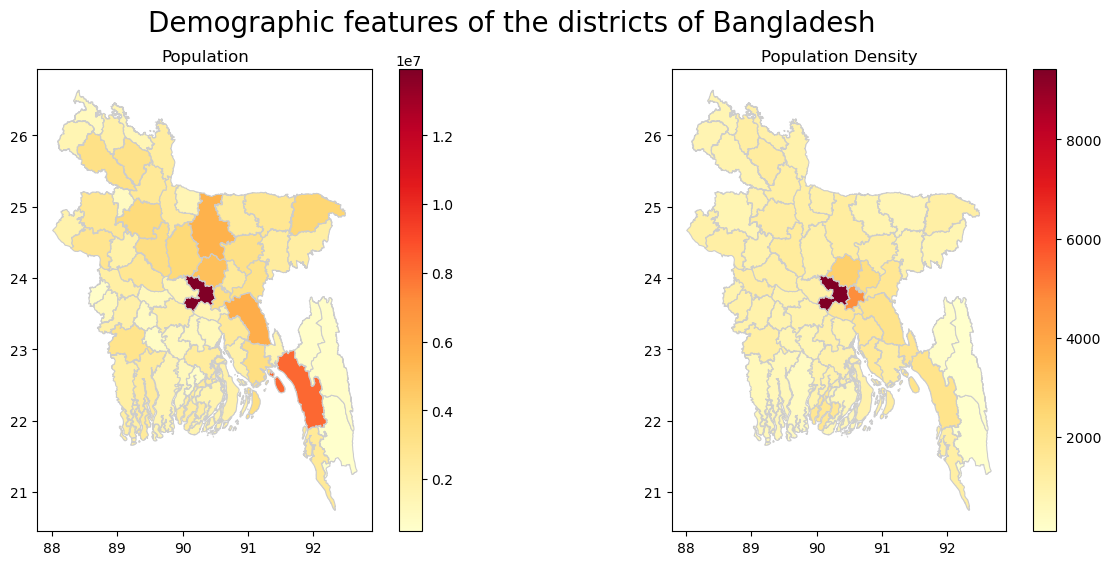

In [19]:
# this cell creates population and population density maps for each of the 64 districts (level 2)

# create a data frame of mean (2010-2021) population in each district, as well as its population density
pop_data = data.groupby('ADM2_name')[['POPULATION', 'AREA_km2']].mean()
pop_data['POP_DENSITY'] = pop_data['POPULATION']/pop_data['AREA_km2']
merged_df = map_df2.merge(pop_data, left_on = 'NAME_2', right_on = "ADM2_name", how = 'left')

# plot the maps, set the titles
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
merged_df.plot(column = 'POPULATION', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[0], edgecolor = '0.8', legend = True)
merged_df.plot(column = 'POP_DENSITY', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[1], edgecolor = '0.8', legend = True)
ax[0].set_title('Population')
ax[1].set_title('Population Density')
fig.suptitle('Demographic features of the districts of Bangladesh', fontsize = 20)
plt.show()

In [20]:
# this cell contains setup for following cells, which do a lot of map plotting

def plot_cell_rate(ax, x, y, num, denom, data):
    '''
    A function to plot the rate of occurrence of event num per event denom in cell (x, y) of a matplotlib grid ax
    Data as input should include the Bangladesh level 2 shapefile data
    This is a helper function and places very strong assumptions on its inputs
    '''
    # find and plot the required quotient on the map
    data['RATE'] = data[num]/data[denom]
    data.plot(column = 'RATE', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y,x], edgecolor = '0.8', legend = True)

    return None

# this is the data for not splitting by event type in the first grid of maps
event_fatal_data = data.groupby('ADM2_name')[['FATALITIES', 'EVENT_COUNTS', 'POPULATION', 'AREA_km2']].agg({'FATALITIES':'sum',
                                                                                                            'EVENT_COUNTS':'sum',
                                                                                                            'POPULATION':'mean',
                                                                                                            'AREA_km2':'mean'})

# this is the data which is also 
grouped_event_fatal_data = data.groupby(['ADM2_name', 'EVENT_TYPE'], as_index=False)[['FATALITIES', 'EVENT_COUNTS', 'POPULATION', 'AREA_km2']].agg({'FATALITIES':'sum',
                                                                                                                          'EVENT_COUNTS':'sum',
                                                                                                                          'POPULATION':'mean',
                                                                                                                          'AREA_km2':'mean'})

# graphical data for the first set of maps
merged_df1 = map_df2.merge(event_fatal_data, left_on = 'NAME_2', right_on = "ADM2_name", how = 'left')

# graphical data for the second set of maps
merged_df2 = map_df2.merge(grouped_event_fatal_data, left_on = 'NAME_2', right_on = "ADM2_name", how = 'left')

# lists of measured quantities
x_cats = ['POPULATION', 'EVENT_COUNTS', 'FATALITIES']
y_cats = ['AREA_km2', 'POPULATION', 'EVENT_COUNTS']

# dictionaries for neat titling
neat_dic_x = {'POPULATION':'Population', 'EVENT_COUNTS':'Events', 'FATALITIES':'Fatalities'}
neat_dic_y = {'POPULATION':'person', 'EVENT_COUNTS':'event', 'AREA_km2':'km$^2$'}

# dictionary to get shorter event names
event_brief = {'Battles': 'Battles',
               'Explosions/Remote violence': 'Explosions',
               'Protests': 'Protests',
               'Riots': 'Riots',
               'Strategic developments': 'Strat. devel\'s',
               'Violence against civilians': 'Viol. a/ civil\'s'}

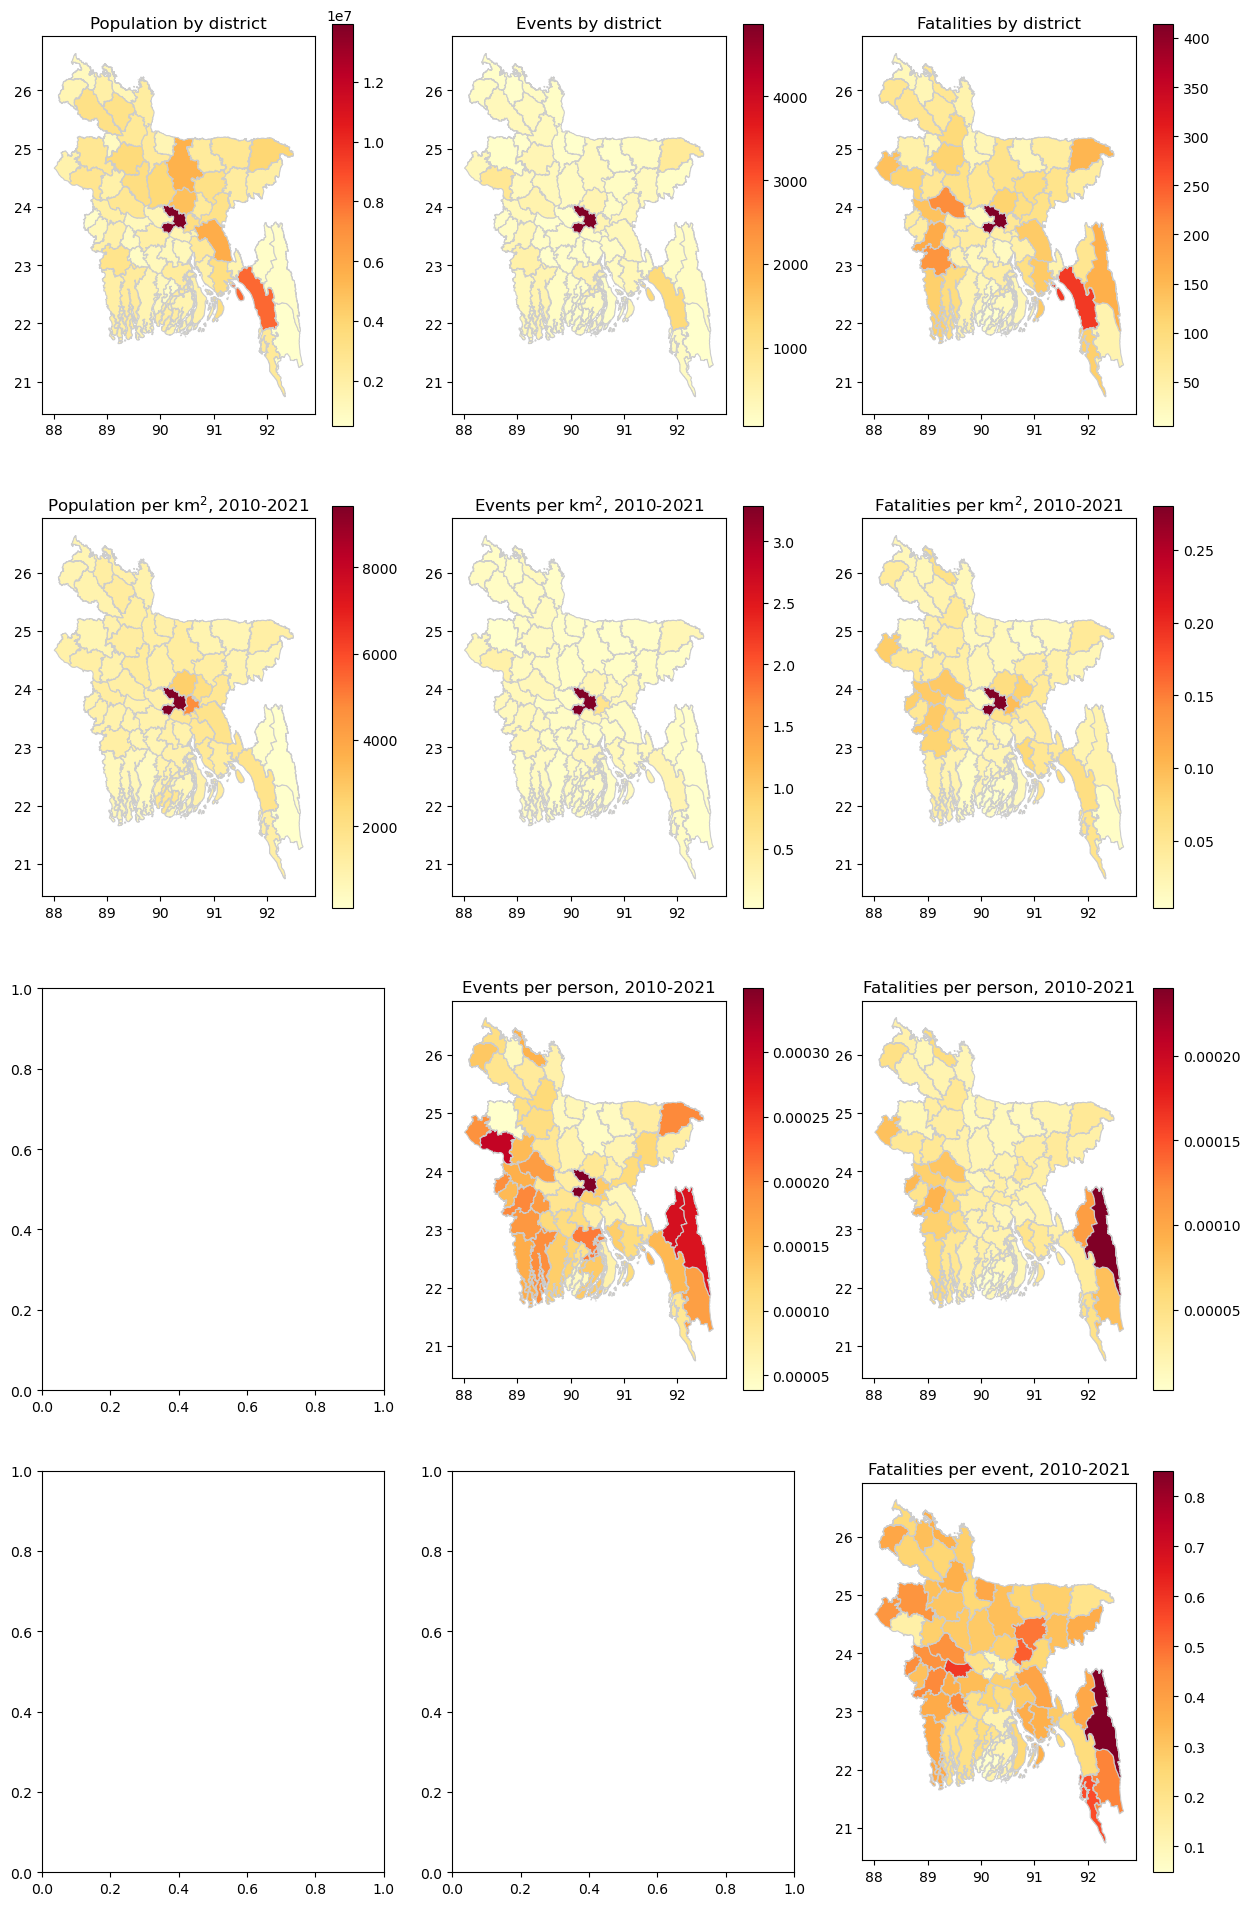

In [21]:
# this creates 9 maps showing various features of events and fatalities in each region

fig, ax = plt.subplots(4, 3, figsize=(15, 24))

for x_idx, x in enumerate(x_cats):
    merged_df1.plot(column = x, cmap = 'YlOrRd', linewidth = 0.8, ax = ax[0, x_idx], edgecolor = '0.8', legend = True)
    ax[0, x_idx].set_title(rf'{neat_dic_x[x]} by district')
    for y_idx, y in enumerate(y_cats):
        if y_idx <= x_idx:
            plot_cell_rate(ax, x_idx, y_idx+1, x, y, merged_df1)
            ax[y_idx+1, x_idx].set_title(rf'{neat_dic_x[x]} per {neat_dic_y[y]}, 2010-2021')

In [22]:
%%script false --no-raise-error # comment this line out to make the cell run

# this creates 42 maps, showing similar data to above but split by event type

fig, ax = plt.subplots(6, 7, figsize = (42,36))

merged_df2_grouped = merged_df2.groupby('EVENT_TYPE')

for y_idx, (event, df) in enumerate(merged_df2_grouped):
    # column 0 is the raw event count
    df.plot(column = 'EVENT_COUNTS', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 0], edgecolor = '0.8', legend = True)
    ax[y_idx,0].set_title(f'Total {event_brief[event]} count')
    # columns 1-2 are events per person/area
    for x_idx, denom in enumerate(y_cats[0:2]):
        plot_cell_rate(ax, x_idx+1, y_idx, 'EVENT_COUNTS', denom, df)
        ax[y_idx, x_idx+1].set_title(rf'{event_brief[event]} per {neat_dic_y[denom]}')
    # column 3 is the raw fatality count
    df.plot(column = 'FATALITIES', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 3], edgecolor = '0.8', legend = True)
    ax[y_idx, 3].set_title(f'Total fatalities from {event_brief[event]}')
    # columns 4-6 are fatalities per area/person/event - titles are set individually
    for x_idx, denom in enumerate(y_cats):
        plot_cell_rate(ax, x_idx+4, y_idx, 'FATALITIES', denom, df)
        ax[y_idx, x_idx+4].set_title(rf'{event_brief[event][:-1]} fatalities per {neat_dic_y[denom]}')
    # column 6 needs a different title
    ax[y_idx, 6].set_title(f'Fatalities per {event_brief[event][:-1]}')

plt.show()

### Shifts in the mid 2010s

We discussed that there may be a shift in the interaction between events and fatalities at some point in the middle of the dataset. I believe this is down to two factors:
- the beginning of the [Rohingya genocide](https://en.wikipedia.org/wiki/Rohingya_genocide) in neighbouring Myanmar, which saw refugees fleeing into the southern districts of Chattogram division from October 2016, with the conflict beginning on the 9th October;
- the end of a period of turbulence caused by Islamic extremist attacks [from 2013-2016](https://www.theguardian.com/world/2016/jun/11/bangladesh-murders-bloggers-foreigners-religion), the last major event of this period being the [July 2016](https://en.wikipedia.org/wiki/July_2016_Dhaka_attack) terrorist attack in Dhaka.

It may be that these events are important in the modelling of fatalities resulting from conflict events in Bangladesh, so below I split the data into two sections, before and after October 2016, to see if there is any immediately noticeable difference. I also re-run the mappings without considering the data for Dhaka so that it becomes more clear which regions have higher rates of conflict in comparison to others, even if they have a relatively low rate in comparison to Dhaka.

In [23]:
data_part1 = data.loc[data['DATE'] < '2016-10-01']
data_part2 = data.loc[data['DATE'] > '2016-09-30']

grouped_event_fatal_data1 = data_part1.groupby(['ADM2_name', 'EVENT_TYPE'], as_index=False)[['FATALITIES', 'EVENT_COUNTS', 'POPULATION', 'AREA_km2']].agg({'FATALITIES':'sum',
                                                                                                                          'EVENT_COUNTS':'sum',
                                                                                                                          'POPULATION':'mean',
                                                                                                                          'AREA_km2':'mean'})

grouped_event_fatal_data2 = data_part2.groupby(['ADM2_name', 'EVENT_TYPE'], as_index=False)[['FATALITIES', 'EVENT_COUNTS', 'POPULATION', 'AREA_km2']].agg({'FATALITIES':'sum',
                                                                                                                          'EVENT_COUNTS':'sum',
                                                                                                                          'POPULATION':'mean',
                                                                                                                          'AREA_km2':'mean'})

merged_df_part1 = map_df2.merge(grouped_event_fatal_data1, left_on = 'NAME_2', right_on = 'ADM2_name', how = 'left')
merged_df_part2 = map_df2.merge(grouped_event_fatal_data2, left_on = 'NAME_2', right_on = 'ADM2_name', how = 'left')

In [24]:
%%script false --no-raise-error # comment this line out to make the cell run

fig, ax = plt.subplots(6, 7, figsize = (42,36))

merged_df_grouped1 = merged_df_part1.groupby('EVENT_TYPE')

for y_idx, (event, df) in enumerate(merged_df_grouped1):
    # column 0 is the raw event count
    df.plot(column = 'EVENT_COUNTS', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 0], edgecolor = '0.8', legend = True)
    ax[y_idx,0].set_title(f'Total {event_brief[event]} count')
    # columns 1-2 are events per person/area
    for x_idx, denom in enumerate(y_cats[0:2]):
        plot_cell_rate(ax, x_idx+1, y_idx, 'EVENT_COUNTS', denom, df)
        ax[y_idx, x_idx+1].set_title(rf'{event_brief[event]} per {neat_dic_y[denom]}')
    # column 3 is the raw fatality count
    df.plot(column = 'FATALITIES', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 3], edgecolor = '0.8', legend = True)
    ax[y_idx, 3].set_title(f'Total fatalities from {event_brief[event]}')
    # columns 4-6 are fatalities per area/person/event - titles are set individually
    for x_idx, denom in enumerate(y_cats):
        plot_cell_rate(ax, x_idx+4, y_idx, 'FATALITIES', denom, df)
        ax[y_idx, x_idx+4].set_title(rf'{event_brief[event][:-1]} fatalities per {neat_dic_y[denom]}')
    # column 6 needs a different title
    ax[y_idx, 6].set_title(f'Fatalities per {event_brief[event][:-1]}')

plt.suptitle('Maps with details up to the end of September 2016')

plt.show()

In [25]:
%%script false --no-raise-error # comment this line out to make the cell run

fig, ax = plt.subplots(6, 7, figsize = (42,36))

merged_df_grouped2 = merged_df_part2.groupby('EVENT_TYPE')

for y_idx, (event, df) in enumerate(merged_df_grouped2):
    # column 0 is the raw event count
    df.plot(column = 'EVENT_COUNTS', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 0], edgecolor = '0.8', legend = True)
    ax[y_idx,0].set_title(f'Total {event_brief[event]} count')
    # columns 1-2 are events per person/area
    for x_idx, denom in enumerate(y_cats[0:2]):
        plot_cell_rate(ax, x_idx+1, y_idx, 'EVENT_COUNTS', denom, df)
        ax[y_idx, x_idx+1].set_title(rf'{event_brief[event]} per {neat_dic_y[denom]}')
    # column 3 is the raw fatality count
    df.plot(column = 'FATALITIES', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 3], edgecolor = '0.8', legend = True)
    ax[y_idx, 3].set_title(f'Total fatalities from {event_brief[event]}')
    # columns 4-6 are fatalities per area/person/event - titles are set individually
    for x_idx, denom in enumerate(y_cats):
        plot_cell_rate(ax, x_idx+4, y_idx, 'FATALITIES', denom, df)
        ax[y_idx, x_idx+4].set_title(rf'{event_brief[event][:-1]} fatalities per {neat_dic_y[denom]}')
    # column 6 needs a different title
    ax[y_idx, 6].set_title(f'Fatalities per {event_brief[event][:-1]}')

plt.suptitle('Maps with details from October 2016', fontsize=20)

plt.show()

In [26]:
%%script false --no-raise-error # comment this line out to make the cell run

grouped_event_fatal_data_no_dhaka = grouped_event_fatal_data.loc[grouped_event_fatal_data['ADM2_name'] != 'Dhaka']

merged_df_no_dhaka = map_df2.merge(grouped_event_fatal_data_no_dhaka, left_on = 'NAME_2', right_on = 'ADM2_name', how = 'left')

fig, ax = plt.subplots(6, 7, figsize = (42,36))

merged_df_no_dhaka_grouped = merged_df_no_dhaka.groupby('EVENT_TYPE')

for y_idx, (event, df) in enumerate(merged_df_no_dhaka_grouped):
    # column 0 is the raw event count
    df.plot(column = 'EVENT_COUNTS', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 0], edgecolor = '0.8', legend = True)
    ax[y_idx,0].set_title(f'Total {event_brief[event]} count')
    # columns 1-2 are events per person/area
    for x_idx, denom in enumerate(y_cats[0:2]):
        plot_cell_rate(ax, x_idx+1, y_idx, 'EVENT_COUNTS', denom, df)
        ax[y_idx, x_idx+1].set_title(rf'{event_brief[event]} per {neat_dic_y[denom]}')
    # column 3 is the raw fatality count
    df.plot(column = 'FATALITIES', cmap = 'YlOrRd', linewidth = 0.8, ax = ax[y_idx, 3], edgecolor = '0.8', legend = True)
    ax[y_idx, 3].set_title(f'Total fatalities from {event_brief[event]}')
    # columns 4-6 are fatalities per area/person/event - titles are set individually
    for x_idx, denom in enumerate(y_cats):
        plot_cell_rate(ax, x_idx+4, y_idx, 'FATALITIES', denom, df)
        ax[y_idx, x_idx+4].set_title(rf'{event_brief[event][:-1]} fatalities per {neat_dic_y[denom]}')
    # column 6 needs a different title
    ax[y_idx, 6].set_title(f'Fatalities per {event_brief[event][:-1]}')

plt.suptitle('Maps excluding Dhaka', fontsize=20)

plt.show()

In [27]:
%%script false --no-raise-error # comment this line out to make the cell run

images = ['maps_event_fatality.png', 'maps_no_dhaka.png', 'maps_part1.png', 'maps_part2.png']

image = mpimg.imread(images[int(input('0 for overall, 1 to exclude Dhaka, 2 for pre-Oct 2016, 3 for post-Oct 2016'))])

fig, ax = plt.subplots(figsize = (42, 36))

ax.imshow(image)

plt.show()